
1. **SARIMA and SARIMAX Analysis**:
   - Data visualization (plotting the time series).
   - Stationarity check and making the series stationary if needed.
   - ACF and PACF plots to determine AR and MA terms.
   - SARIMA model training and prediction.
   - SARIMAX model if exogenous variables are needed.
   


2. **Facebook Prophet**:
   - Preparing the data for Prophet (renaming columns).
   - Model fitting and forecasting.
   - Visualizing the predictions.
   


3. **Recurrent Neural Networks (RNNs)**:
   - Data preprocessing for RNNs.
   - Building and training the RNN model.
   - Predictions and evaluation.
   
Let's start with the first part: SARIMA and SARIMAX analysis.



# <a id='toc1_'></a>[Time Series Analysis of COVID](#toc0_)

Models Deployed: ARIMA, SARIMA, SARIMAX, Facebook Prophet, and RNNs
In this notebook, we'll walk through different methods of time series analysis and forecasting using the provided dataset.


**Table of contents**<a id='toc0_'></a>    
- [Time Series Analysis of COVID](#toc1_)    
- [Focused Analysis](#toc2_)    
    - [Visualizing the Data](#toc2_1_1_)    
    - [Checking Stationarity](#toc2_1_2_)    
    - [BoxCox Transformation and Normality Test](#toc2_1_3_)    
    - [Seasonality](#toc2_1_4_)    
    - [ACF and PACF plots](#toc2_1_5_)    
    - [Time Series Cross-Validation Setup](#toc2_1_6_)    
- [Modeling](#toc3_)    
  - [Function for evaluating the model](#toc3_1_)    
  - [ARIMA](#toc3_2_)    
    - [Base Arima Model](#toc3_2_1_)    
    - [Tuned Arima Model](#toc3_2_2_)    
  - [SARIMA](#toc3_3_)    
    - [Base SARIMA Model](#toc3_3_1_)    
    - [Tuned SARIMA Model](#toc3_3_2_)    
  - [Sarimax](#toc3_4_)    
    - [Sarimax Base](#toc3_4_1_)    
    - [Tuned SARIMAX Model](#toc3_4_2_)    
  - [Brute Force Search for SARIMAX Model](#toc3_5_)    
  - [Final Results and Evaluation](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


# <a id='toc2_'></a>[Focused Analysis](#toc0_)



### <a id='toc2_1_1_'></a>[Visualizing the Data](#toc0_)

First, let's visualize the time series data to understand its patterns and trends.


In [1]:
from capstone_functions import *
plt.style.use('seaborn')


Versions used in this notebook:
Python version: 3.9.17 (main, Jul  5 2023, 21:22:06) [MSC v.1916 64 bit (AMD64)]
Pandas version: 2.0.2
Numpy version: 1.23.4
Seaborn version: 0.12.2
Matplotlib version: 3.7.1
Scipy version: 1.10.1
Statsmodels version: 0.14.0
SKLearn version: 1.2.2


C:\Users\Samsickle\AppData\Local\Temp\ipykernel_20304\3570968762.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:

# Load the dataset
master_df = pd.read_parquet("../Data/master_df.parquet")

# These were added later but it was easier to add them here
# master_df = pd.concat([master_df, create_features(master_df).drop(columns=['season','weekday','weekofyear', 'hour'])], axis=1).copy()
# master_df['new_bi_weekly_vaccinations'] = master_df.loc[:,'total_vaccinations'].diff(15).fillna(0)

# Set the random.seed(42)
np.random.seed(42)

# sns.set_style('538')
master_df.info()
master_df.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2020-02-15 to 2023-03-21
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   new_confirmed                         1131 non-null   int32  
 1   new_fatal                             1131 non-null   int32  
 2   confirmed                             1131 non-null   int32  
 3   fatal                                 1131 non-null   int32  
 4   infected                              1131 non-null   int32  
 5   new_recovered                         1131 non-null   int32  
 6   recovered                             1131 non-null   int32  
 7   total_removed                         1131 non-null   int32  
 8   new_hospitalized_patients             944 non-null    float32
 9   current_hospitalized_patients         1131 non-null   float32
 10  current_intensive_care_patients       1131 non-null   float32
 11 

new_confirmed  new_fatal  confirmed  fatal  infected  \
date                                                               
2020-02-15              0          0         15      0        15   
2020-02-16              0          0         15      0        15   
2020-02-17             10          0         25      0        25   
2020-02-18              0          0         25      0        25   
2020-02-19              0          0         25      0        25   

            new_recovered  recovered  total_removed  \
date                                                  
2020-02-15              0          0              0   
2020-02-16              0          0              0   
2020-02-17              0          0              0   
2020-02-18              0          0              0   
2020-02-19              0          0              0   

            new_hospitalized_patients  current_hospitalized_patients  \
date                                                                   
2020-02-15                        0.0                            0.0   
2020-02-16                        0.0                            0.0   
2020-02-17                        0.0                            0.0   
2020-02-18                        0.0                            0.0   
2020-02-19                        0.0                            0.0   

            current_intensive_care_patients  average_temperature_celsius  \
date                                                                       
2020-02-15                              0.0                     0.956790   
2020-02-16                              0.0                     3.919753   
2020-02-17                              0.0                     6.197531   
2020-02-18                              0.0                     0.592593   
2020-02-19                              0.0                    -2.753086   

            cancel_events  cumulative_hospitalized_patients  \
date                                                          
2020-02-15            0.0                               0.0   
2020-02-16            0.0                               0.0   
2020-02-17            0.0                               0.0   
2020-02-18            0.0                               0.0   
2020-02-19            0.0                               0.0   

            derived_reproduction_rate  dew_point  excess_mortality  \
date                                                                 
2020-02-15                  35.466824  -6.882716         -2.363827   
2020-02-16                  34.655106  -5.919753         -2.360000   
2020-02-17                  33.889042  -0.481481         -2.294236   
2020-02-18                  33.163906  -5.759259         -2.166535   
2020-02-19                  32.475555  -7.364198         -1.976897   

            excess_mortality_cumulative  excess_mortality_cumulative_absolute  \
date                                                                            
2020-02-15                    -3.049970                         -12854.276367   
2020-02-16                    -3.030000                         -13024.399414   
2020-02-17                    -3.005807                         -13172.550781   
2020-02-18                    -2.977392                         -13298.730469   
2020-02-19                    -2.944754                         -13402.938477   

            facial_coverings  gatherings_restrictions  information_campaigns  \
date                                                                           
2020-02-15               0.0                      0.0                    0.0   
2020-02-16               0.0                      0.0                    0.0   
2020-02-17               0.0                      0.0                    0.0   
2020-02-18               0.0                      0.0                    0.0   
2020-02-19               0.0                      0.0                    0.0   

            internal_movement_restrictions  \
dat

In [3]:
no_null_rows = master_df.dropna().copy()

no_null_col = master_df.dropna(axis=1).copy()


cutoff=28
cutoff_date = no_null_col.index.max() - pd.Timedelta(days=cutoff)

train_df = no_null_col[no_null_col.index < cutoff_date].copy()
test_df = no_null_col[no_null_col.index >= cutoff_date].copy()


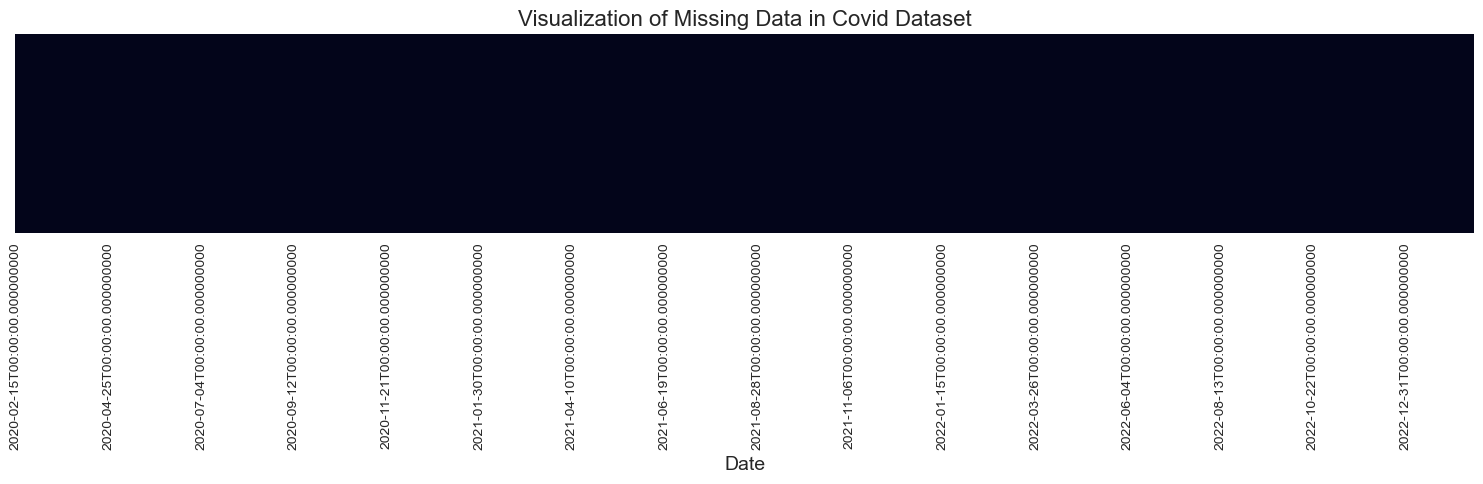

In [4]:
# Your existing code
plt.figure(figsize=(15,5))
sns.heatmap(train_df.isna().T, yticklabels=[], cbar=False)

# Setting x-axis to show every 3 months and starting from 2020-02-15
ax = plt.gca()
xticks = ax.get_xticks()
ax.set_xticks(xticks[::5])

plt.title("Visualization of Missing Data in Covid Dataset", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.tight_layout()
plt.show()

In [5]:
# Creating subplots vertically aligned
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("Daily Confirmed Cases", "Currently Infected", "Total Confirmed"))

# Adding traces for the train dataset
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['new_confirmed'], name='New Confirmed (Train)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['infected'], name='Currently Infected (Train)', line=dict(color='blue')), row=2, col=1)
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['confirmed'], name='Total Confirmed (Train)', line=dict(color='blue')), row=3, col=1)

# Adding traces for the test dataset
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['new_confirmed'], name='New Confirmed (Test)', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['infected'], name='Currently Infected (Test)', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['confirmed'], name='Total Confirmed (Test)', line=dict(color='red')), row=3, col=1)

# Update the layout
fig.update_layout(height=800, 
                width=1000, 
                title='Daily Confirmed Cases, Currently Infected, and Total Confirmed',
                xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='New Confirmed Cases', row=1, col=1)
fig.update_yaxes(title_text='Currently Infected', row=2, col=1)
fig.update_yaxes(title_text='Total Confirmed', row=3, col=1)



### <a id='toc2_1_2_'></a>[Checking Stationarity](#toc0_)
Before applying ARIMA or its variants, it's essential to ensure our time series is stationary.


In [6]:
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:3], index=['Test Statistic','p-value','Number of Observations Used'])
    return dfoutput


test_stationarity(train_df['confirmed'])

# # Display the collected test statistics for each differencing level
# for i, test_stat in enumerate(test_statistics, 1):
#     print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Results of Dickey-Fuller Test:


Test Statistic                   -0.002479
p-value                           0.958327
#Lags Used                       22.000000
Number of Observations Used    1079.000000
Critical Value (1%)              -3.436425
Critical Value (5%)              -2.864222
Critical Value (10%)             -2.568198
dtype: float64


If the `p-value` is less than 0.05, the series is stationary. Otherwise, you might need to take differences or transformations to make it stationary.


In [7]:
# List to collect the 'Test Statistic' values for each differencing level
test_statistics = []

# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = train_df['confirmed'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -4.75
Differencing Level 2: Test Statistic = -4.41
Differencing Level 3: Test Statistic = -4.36
Differencing Level 4: Test Statistic = -3.59
Differencing Level 5: Test Statistic = -3.83
Differencing Level 6: Test Statistic = -3.53
Differencing Level 7: Test Statistic = -3.46
Differencing Level 8: Test Statistic = -3.11
Differencing Level 9: Test Statistic = -2.91
Differencing Level 10: Test Statistic = -3.13
Differencing Level 11: Test Statistic = -2.93
Differencing Level 12: Test Statistic = -3.30
Differencing Level 13: Test Statistic = -3.90
Differencing Level 14: Test Statistic = -4.08
Differencing Level 15: Test Statistic = -4.41
Differencing Level 16: Test Statistic = -3.50
Differencing Level 17: Test Statistic = -3.57
Differencing Level 18: Test Statistic = -3.62
Differencing Level 19: Test Statistic = -3.66


In [8]:
test_stationarity(train_df['new_confirmed'])


Results of Dickey-Fuller Test:


Test Statistic                   -4.747711
p-value                           0.000068
#Lags Used                       21.000000
Number of Observations Used    1080.000000
Critical Value (1%)              -3.436419
Critical Value (5%)              -2.864220
Critical Value (10%)             -2.568197
dtype: float64

### <a id='toc2_1_3_'></a>[BoxCox Transformation and Normality Test](#toc0_)

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\utils\visualization.py:220: FutureWarning:

the 'unbiased' keyword is deprecated, use 'adjusted' instead.



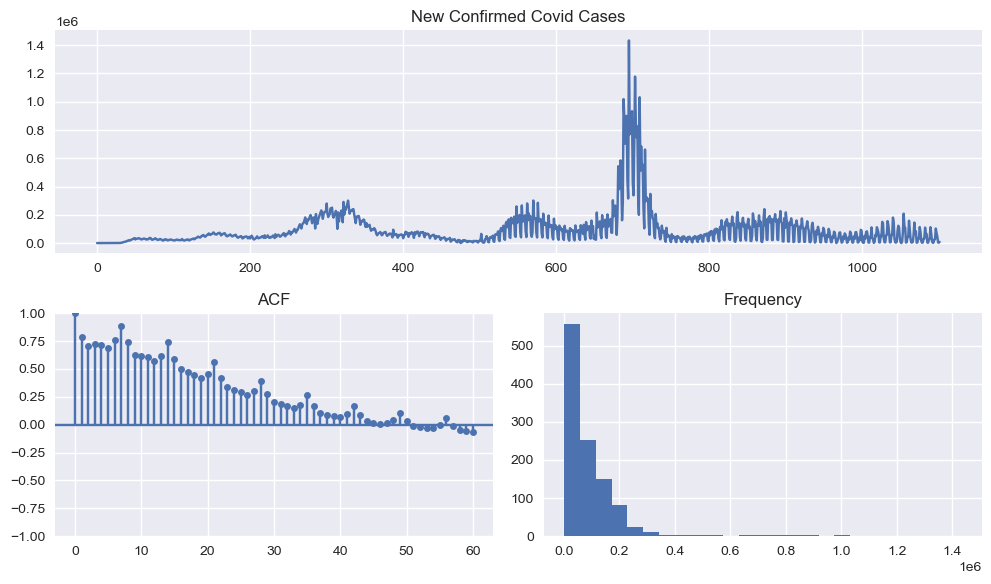

In [9]:
# sns.histplot(data = train_df, x='new_confirmed', bins=100, kde=True);

pm.tsdisplay(train_df['new_confirmed'], title="New Confirmed Covid Cases", lag_max=60, figsize=(10, 6));


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\utils\visualization.py:220: FutureWarning:

the 'unbiased' keyword is deprecated, use 'adjusted' instead.



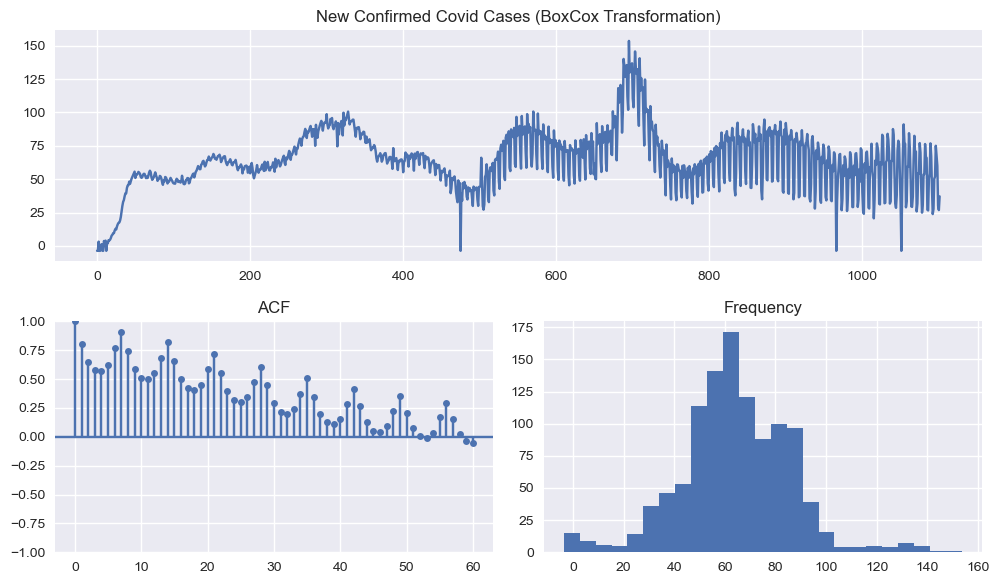

In [10]:
boxcox = BoxCoxEndogTransformer(lmbda2=1e-6)
covid_array = boxcox.fit_transform(train_df['new_confirmed'])[0]
covid_transformed = pd.Series(covid_array, index=train_df.index)

pm.tsdisplay(covid_transformed, title="New Confirmed Covid Cases (BoxCox Transformation)", lag_max=60, figsize=(10, 6))


### <a id='toc2_1_4_'></a>[Seasonality](#toc0_)

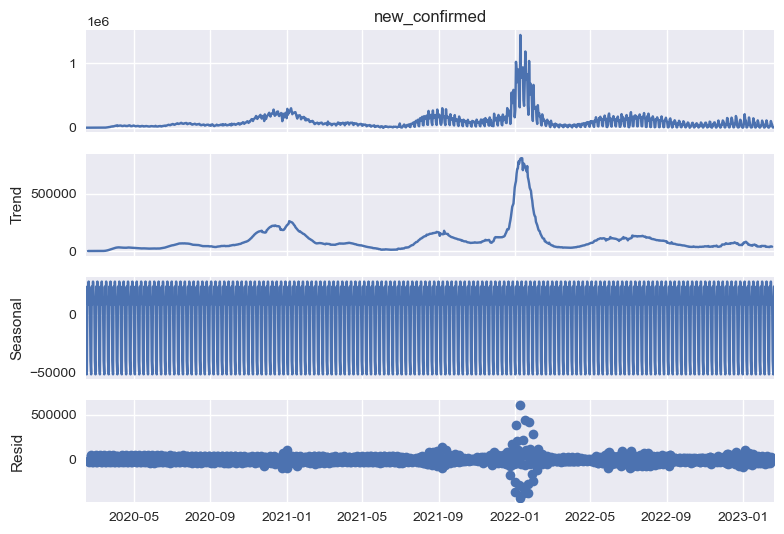

In [11]:
# Performing seasonal decomposition on 'new_confirmed' column
tsa.seasonal_decompose(train_df['new_confirmed'], model='additive', period=7).plot();


This is a little difficult for me to understand, except to say that there really doesn't appear to be much of a seasonal component.

In [12]:
features, target = create_features(train_df, label='new_confirmed')
features_and_target = pd.concat([features, target], axis=1)

features_and_target.head()

hour  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
date                                                                       
2020-02-15     0          5        1      2  2020         46          15   
2020-02-16     0          6        1      2  2020         47          16   
2020-02-17     0          0        1      2  2020         48          17   
2020-02-18     0          1        1      2  2020         49          18   
2020-02-19     0          2        1      2  2020         50          19   

            weekofyear    weekday  season  new_confirmed  
date                                                      
2020-02-15           7   Saturday  Winter              0  
2020-02-16           7     Sunday  Winter              0  
2020-02-17           8     Monday  Winter             10  
2020-02-18           8    Tuesday  Winter              0  
2020-02-19           8  Wednesday  Winter              0

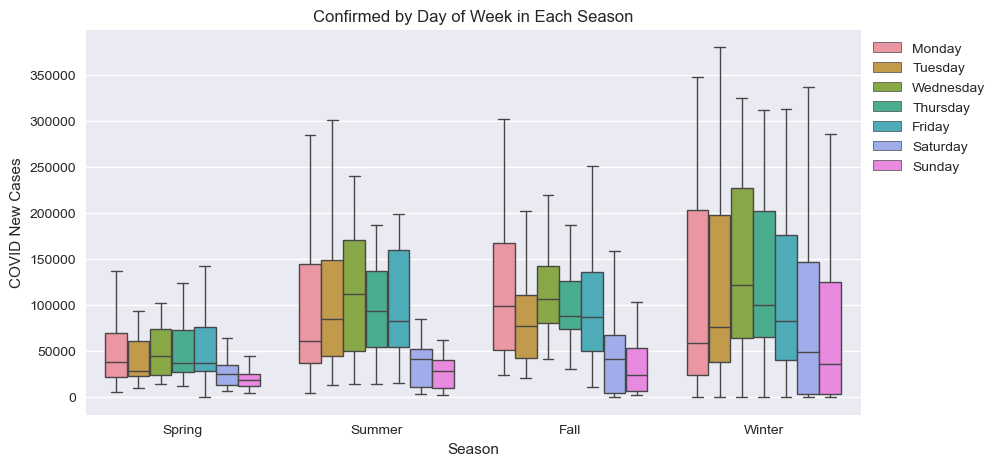

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='season',
            y='new_confirmed',
            hue='weekday',
            ax=ax,
            linewidth=1,
            showfliers=False)
ax.set_title('Confirmed by Day of Week in Each Season')
ax.set_xlabel('Season')
ax.set_ylabel('COVID New Cases')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


### <a id='toc2_1_5_'></a>[ACF and PACF plots](#toc0_)

To determine the order of the AR and MA terms, we can plot the autocorrelation and partial autocorrelation charts.


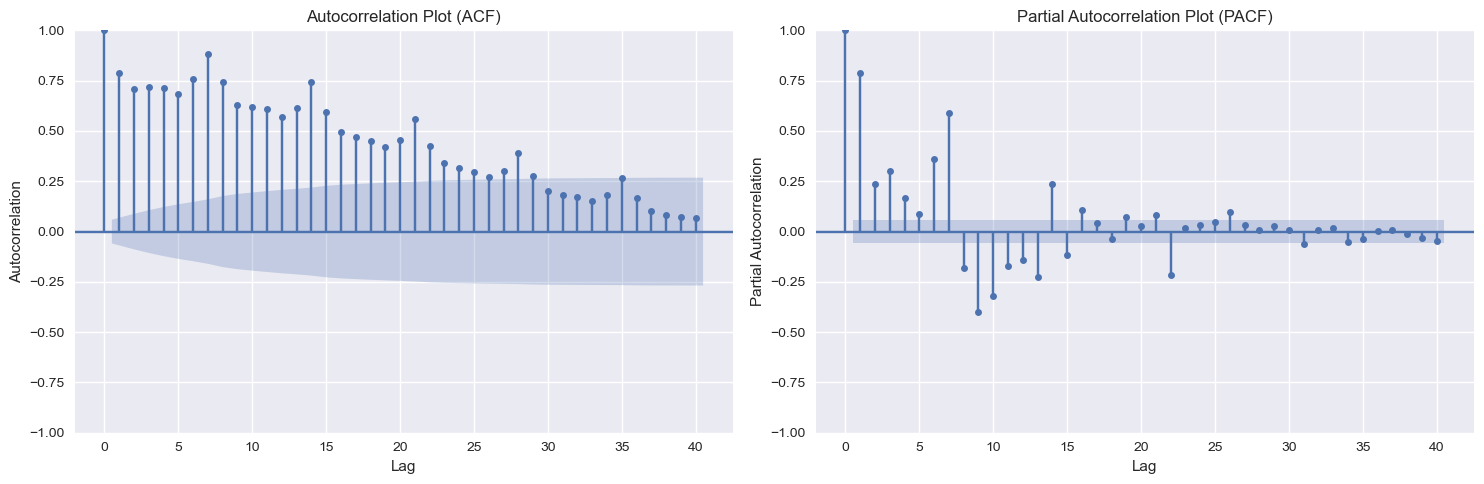

129986.2766357533

In [14]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].std()

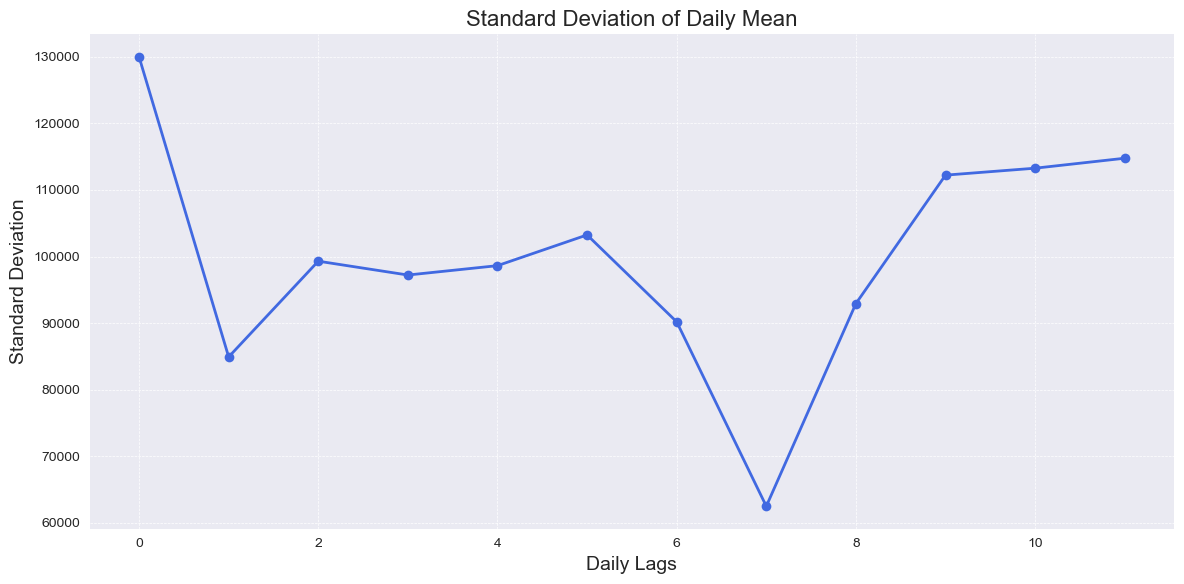

The Base Standard Deviation is : 129986.2766357533
The Standard Deviation of the Daily Mean is: 84930.9677390068
The Standard Deviation of the Daily Mean is: 99308.81633445295
The Standard Deviation of the Daily Mean is: 97230.39922008778
The Standard Deviation of the Daily Mean is: 98637.64501646261
The Standard Deviation of the Daily Mean is: 103252.6258709214
The Standard Deviation of the Daily Mean is: 90201.08404599907
The Standard Deviation of the Daily Mean is: 62507.23981492211
The Standard Deviation of the Daily Mean is: 92942.19266814418
The Standard Deviation of the Daily Mean is: 112230.52940170362
The Standard Deviation of the Daily Mean is: 113272.93016440432
The Standard Deviation of the Daily Mean is: 114769.03077784073


In [15]:
def plot_standard_deviation(data, freq, title):
    std_list = [data['new_confirmed'].std()]
    range_limit = 12 if freq == 'Daily' else 7
    for i in range(1, range_limit):
        diff_dev = data['new_confirmed'].diff(i).std()
        std_list.append(diff_dev)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(std_list, marker='o', linestyle='-', color='royalblue', linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel(f'{freq} Lags', fontsize=14)
    plt.ylabel('Standard Deviation', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    

plot_standard_deviation(train_df, 'Daily', 'Standard Deviation of Daily Mean')

print('The Base Standard Deviation is :', train_df['new_confirmed'].std())

for i in range(1, 12):
    diff_dev = train_df['new_confirmed'].diff(i).std()
    
    print('The Standard Deviation of the Daily Mean is:', diff_dev)


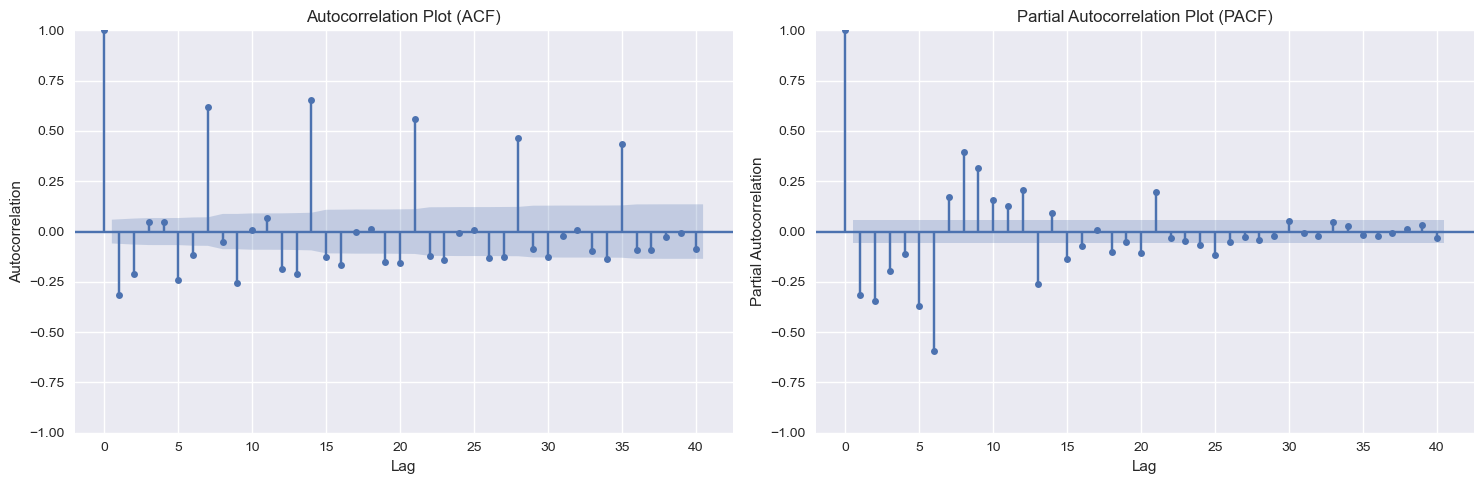

84930.9677390068

In [16]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
adjusting_diff = 1

# Plot ACF
plot_acf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].diff(adjusting_diff).std()

From the PACF it looks like our auto regressive model would only benefit by a maximum of 15-16 days. We will use this as our base p value.  
From our ACF graph it looks like our moving average model would only benefit by a maximum of 25-28 days. We will use this as our base q value.  

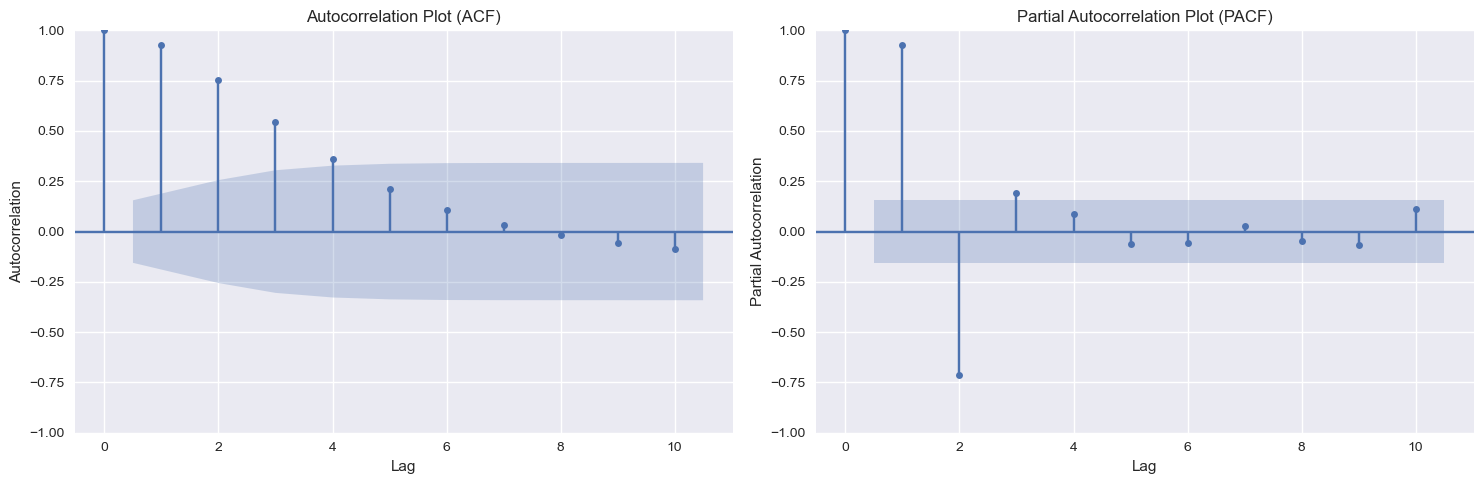

114494.72691084369

In [17]:
weekly_mean = train_df.resample('W').mean()


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(weekly_mean['new_confirmed'].dropna(), lags=10, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(weekly_mean['new_confirmed'].dropna(), lags=10, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

weekly_mean['new_confirmed'].std()

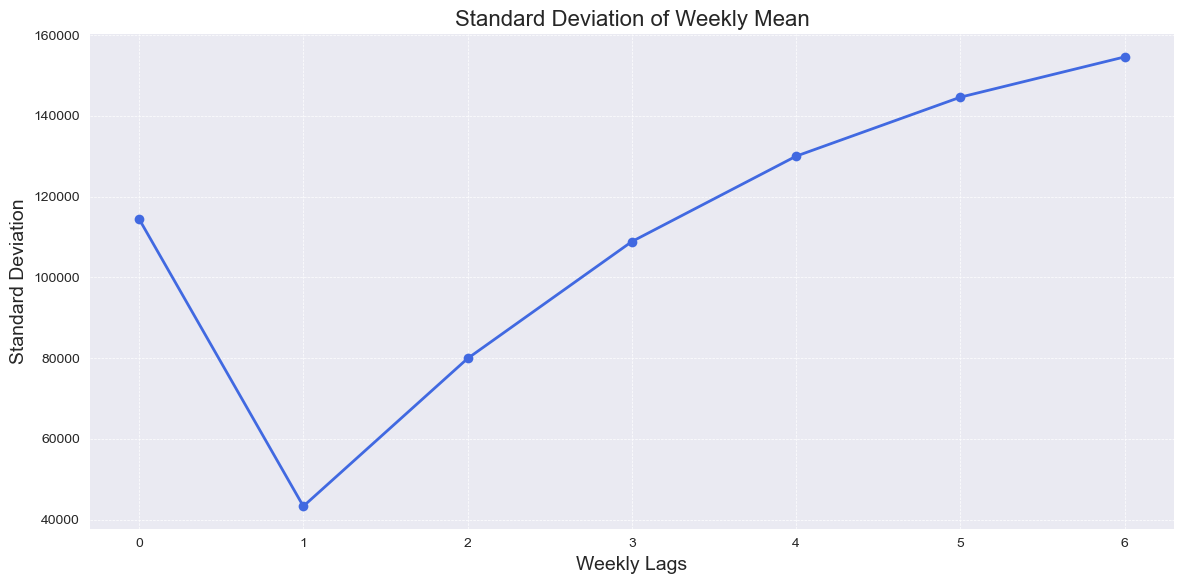

The Base Standard Deviation is : 114494.72691084369
The Standard Deviation of the Weekly Mean is: 43327.72309676952
The Standard Deviation of the Weekly Mean is: 79933.99851894338
The Standard Deviation of the Weekly Mean is: 108892.64891589076
The Standard Deviation of the Weekly Mean is: 130048.05187368972
The Standard Deviation of the Weekly Mean is: 144658.4951604132
The Standard Deviation of the Weekly Mean is: 154631.80116427987


In [18]:

# Plotting the two graphs with enhancements
plot_standard_deviation(weekly_mean, 'Weekly', 'Standard Deviation of Weekly Mean')

print('The Base Standard Deviation is :', weekly_mean['new_confirmed'].std())

for i in range(1, 7):
    diff_dev = weekly_mean['new_confirmed'].diff(i).std()
    
    print('The Standard Deviation of the Weekly Mean is:', diff_dev)


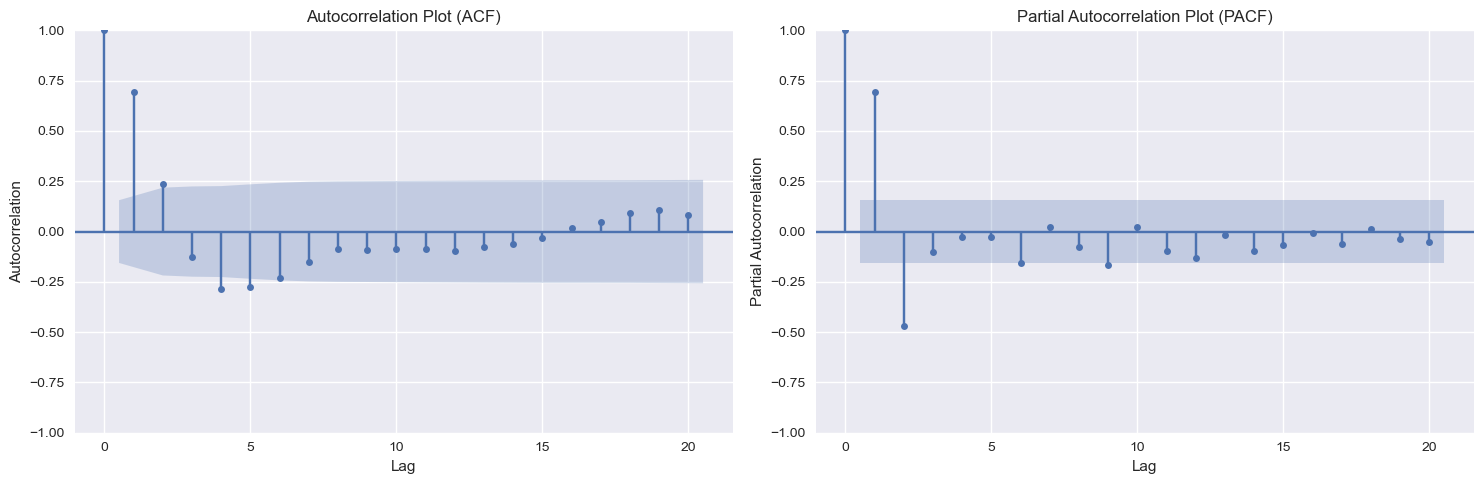

43327.72309676952

In [19]:
weekly_mean = train_df.resample('W').mean()
adjusting_diff = 1


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(weekly_mean['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(weekly_mean['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

weekly_mean['new_confirmed'].diff(adjusting_diff).std()

### <a id='toc2_1_6_'></a>[Time Series Cross-Validation Setup](#toc0_)

In [20]:
def plot_cross_val(df: pd.DataFrame,
                    title_text: str,
                    fold_size: int,
                    adjustment: int,
                    rolling: bool=False,
                    window_size: int=150,
                    initial_size: int=200) -> pd.DataFrame:
    """
    Visualize the train and test splits of cross-validation using Plotly.
    
    This function generates a visual representation of how data is split into 
    training and testing sets across multiple iterations of a cross-validation 
    process. It's particularly useful for understanding the behavior of different 
    cross-validation strategies, such as KFold or TimeSeriesSplit.
    
    Parameters:
    - n_splits (int): Number of splits for cross-validation.
    - splitter_func (callable): Cross-validation splitting strategy (e.g., KFold, TimeSeriesSplit).
    - df (pd.DataFrame): Dataframe whose index is to be used for splitting.
    - title_text (str): Title of the plot.
    
    Returns:
    - plot_df (pd.DataFrame): DataFrame with indices used for each split and their corresponding labels.
    """
    
    split = 1
    plot_data = []

    if rolling:
    # Iterate through train and test splits provided by the splitter function
    
        rolling_cv = RollingForecastCV(
            h=fold_size,            # Forecast horizon (28 step ahead)
            step=fold_size+adjustment,         # Step size for rolling window (28 step at a time)
            initial=initial_size)   # Skip the first 20 observations for warm-up
        for train_index, valid_index in rolling_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    else:
        window_cv = pm.model_selection.SlidingWindowForecastCV(
            window_size=window_size,         # Window size (150 observations)
            h=fold_size,             # Forecast horizon (28 step ahead)
            step=fold_size+adjustment)          # Step size for rolling window (28 step at a time)
        # Iterate through train and test splits provided by the splitter function
        
        for train_index, valid_index in window_cv.split(df):
            plot_data.append([train_index, 'Train', f'{split}'])
            plot_data.append([valid_index, 'Test', f'{split}'])
            split += 1
    
    # Create a DataFrame to hold the indices for plotting
    plot_df = pd.DataFrame(plot_data, columns=['Index', 'Dataset', 'Split']).explode('Index')
    plot_df['Split'] = plot_df['Split'].astype(int)
    plot_df = plot_df.sort_values('Split')

    # Initialize a Plotly figure
    fig = go.Figure()

    # Add traces for each train and test split
    for _, group in plot_df.groupby('Split'):
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Train'],
                                y=group['Split'].loc[group['Dataset'] == 'Train'],
                                name='Train',
                                line=dict(color="blue", width=10)
                                ))
        fig.add_trace(go.Scatter(x=group['Index'].loc[group['Dataset'] == 'Test'],
                                y=group['Split'].loc[group['Dataset'] == 'Test'],
                                name='Test',
                                line=dict(color="goldenrod", width=10)
                                ))

    # Configure plot layout
    fig.update_layout(template="simple_white", 
                    font=dict(size=20),
                    title_text=title_text, 
                    title_x=0.5, width=850,
                    height=450, 
                    xaxis_title='Index', 
                    yaxis_title='Split')

    # Update legend to avoid duplicate entries
    legend_names = set()
    fig.for_each_trace(
        lambda trace:
        trace.update(showlegend=False)
        if (trace.name in legend_names) else legend_names.add(trace.name))
    fig.show()
    

In [21]:
in_sample_set = train_df['new_confirmed']
out_of_sample_set = test_df['new_confirmed']

number_of_folds = 30

fold_size = int(((len(in_sample_set)-200)/number_of_folds)-round(30/number_of_folds))
adjustment=0

print("Fold Size =", fold_size)


rolling_cv = RollingForecastCV(
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size+adjustment,  # Step size for rolling window (28 step at a time)
    initial=200)  # Skip the first 200 observations for warm-up


# Plot the time series cross validation splits
plot_cross_val(in_sample_set,
            'Time Series Rolling Forecast Cross-Validation',
            fold_size,
            rolling=True, 
            adjustment=adjustment)

window_cv = pm.model_selection.SlidingWindowForecastCV(
    window_size=150, # Window size (150 observations)
    h=fold_size,  # Forecast horizon (28 step ahead)
    step=fold_size+adjustment)  # Step size for rolling window (28 step at a time)

# Plot the time series cross validation splits
plot_cross_val(in_sample_set,
            'Time Series Sliding Window Cross-Validation',
            fold_size,
            rolling=False, 
            adjustment=adjustment)

Fold Size = 29


# <a id='toc3_'></a>[Modeling](#toc0_)

## <a id='toc3_1_'></a>[Function for evaluating the model](#toc0_)

Creating Functions for Time Series Evaluation

In [22]:
from matplotlib.ticker import FuncFormatter, PercentFormatter

# Format right y-axis with comma notation
def comma_format(x, _):
    return f'{x:,.0f}'

def mape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual+1)))

def smape(actual, pred):
    return 100 * np.mean(np.abs(actual - pred) / (np.abs(actual) + np.abs(pred)))

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred)**2))


In [23]:
def train_model(y: pd.Series, pipeline, cv, X: pd.DataFrame=None):
    """
    Train a model on the given data and generate predictions.
    
    Parameters:
    - y: DataFrame containing the training data.
    - pipeline: Preprocessing pipeline for the data.
    - cv: Cross-validator for time series data.
    
    Returns:
    - model_preds: Series of model predictions.
    - model_scores: DataFrame containing the scores for various metrics.
    """
    model_preds_data = {
        'predicted': [],  # predicted values
        'lower_conf': [], # lower confidence interval
        'upper_conf': [], # upper confidence interval
        'date': [] # date of prediction
    }
    
    # model_mape_score = pd.Series(name='mape')
    model_smape_score = pd.Series(name='smape')
    model_rmse_score = pd.Series(name='rmse')
    model_mae_score = pd.Series(name='mae')
    
    for train_idx, test_idx in tqdm(cv.split(y)):
        train_set = y.iloc[train_idx]
        test_set = y.iloc[test_idx]
        
        train_exogenous = X.iloc[train_idx] if X is not None else None
        test_exogenous = X.iloc[test_idx] if X is not None else None
        
        assert not train_set.isna().any(), "train_set contains NaN values"
        assert not test_set.isna().any(), "test_set contains NaN values"
        
        model = pipeline.fit(train_set, train_exogenous)
        
        try:
            prediction, conf = model.predict(len(test_set), test_exogenous, return_conf_int= True)
        except:
            prediction = model.predict(len(test_set), test_exogenous)
            conf = np.full(shape=(len(test_set), 2), fill_value=prediction)
        lower_conf = conf[:,0]
        upper_conf = conf[:,1]
            
        model_preds_data['predicted'].extend(prediction)
        model_preds_data['lower_conf'].extend(lower_conf)
        model_preds_data['upper_conf'].extend(upper_conf)
        model_preds_data['date'].extend(test_set.index)
        
        first_date = test_set.index[0]
        model_smape_score[first_date] = smape(test_set, prediction)
        model_rmse_score[first_date] = rmse(test_set, prediction)
        model_mae_score[first_date] = np.mean(np.abs(test_set - prediction))
        # model_mape_score[first_date] = mape(test_set, prediction)
    
    # Generating Daily Metrics
    daily_metrics = pd.DataFrame(model_preds_data)
    daily_metrics['date'] = pd.to_datetime(daily_metrics['date'])
    daily_metrics.set_index('date', inplace=True)
    daily_metrics = pd.concat([daily_metrics, y], axis=1, join='outer')
    daily_metrics['residual'] = daily_metrics[y.name] - daily_metrics['predicted']
    daily_metrics['smape'] =  100 * np.abs(daily_metrics[y.name] - daily_metrics['predicted']) / (np.abs(daily_metrics[y.name]) + np.abs(daily_metrics['predicted']))


    # Generating Model Scores on Validation Sets
    model_scores = pd.DataFrame(
        index=['MAE', 'RMSE', 'sMAPE'], 
        data=[model_mae_score, model_rmse_score, model_smape_score]
    ).T

    # Fitting the Model on the Entire Dataset
    model = pipeline.fit(y)

    return daily_metrics, model_scores, model



In [24]:
def plot_combined_charts(daily_df: pd.DataFrame, validation_scores_df: pd.DataFrame, target_column: str) -> None:
    """
    Plot actual vs predicted values and evaluation metrics side by side.
    
    This function visualizes the actual vs predicted values and evaluation metrics 
    (MAPE, SMAPE, MAE, RMSE) side by side in a 1x2 grid.
    
    Parameters:
    - daily_df (pd.DataFrame): A dataframe containing the actual and predicted values.
    - validation_scores_df (pd.DataFrame): A dataframe with columns 'mape', 'smape', 'mae', and 'rmse'.
    - target_column (str): The name of the target column for which predictions are made.
    
    Returns:
    None. The function displays the plots.
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot Actual vs Predicted on the first axis
    daily_df[f'{target_column}'].plot(ax=ax1, label='Actual', linewidth=2)
    daily_df['predicted'].plot(ax=ax1, label='Cross-Validation Predicted', linestyle='--', linewidth=2)
    ax1.yaxis.set_major_formatter(FuncFormatter(comma_format))
    ax1.set_title(f'Cross Validation of {target_column.replace("_", " ").capitalize()}: Model Predictions vs Actual Data', fontsize=14)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Count')
    ax1.legend()
    
    # Plot Error Metrics on the second axis
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['MAE'], ax=ax2, label='MAE', color='b')
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['RMSE'], ax=ax2, label='RMSE', color='g')
    
    ax3 = ax2.twinx()
    sns.lineplot(x=validation_scores_df.index, y=validation_scores_df['sMAPE'], ax=ax3, label='sMAPE', color='purple', linestyle='--')
    ax2.set_ylabel('Absolute Error (Covid Cases)')
    ax3.set_ylabel('Percentage Error (Covid Cases)')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x/100)))
    ax3.set_ylim(0, 100)
    ax2.set_title('Cross-Validation Error Metrics: Error over Different Time Periods', fontsize=14)
    ax2.set_xlabel('Date')
    
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles3, labels3 = ax3.get_legend_handles_labels()
    ax2.legend(handles=handles2 + handles3, labels=labels2 + labels3, loc='upper left')
    
    plt.tight_layout()
    plt.show()


In [25]:
def plot_predictions_with_confidence_interval(in_sample_set, model, X_train=None):
    """
    Plot actual versus predicted values along with the 95% confidence interval.
    
    This function takes the actual in-sample set and a fitted model to generate a plot
    showcasing the actual values, predicted values, and the confidence interval. It then
    calculates and returns evaluation metrics in a DataFrame.
    
    Parameters:
    - in_sample_set (pd.Series): The actual values.
    - model: The fitted model.
    
    Returns:
    pd.DataFrame: A dataframe containing evaluation metrics.
    """
    
    # Predict in-sample values and get confidence intervals
    predicted_values, conf_int = model.predict_in_sample(X=X_train, return_conf_int=True, start=60)
    in_sample_set = in_sample_set[60:]
    # Create a DataFrame for easier plotting and analysis
    df = pd.DataFrame({
        in_sample_set.name: in_sample_set, 
        'predicted_in_sample': predicted_values,
        'upper_conf': conf_int[:, 1],
        'lower_conf': conf_int[:, 0],
        'residuals': in_sample_set - predicted_values
    }, index=in_sample_set.index)

    # Initialize a Plotly figure for visualization
    fig = go.Figure()

    # Add traces for actual and predicted values, as well as confidence intervals
    fig.add_trace(go.Scatter(x=df.index, y=df[in_sample_set.name], mode='lines', name='Actual', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df.index, y=df['predicted_in_sample'], mode='lines', name='Predicted', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=df.index, y=df['upper_conf'], mode='lines', line=dict(color='rgba(255, 0, 0, 0.3)', width=0), showlegend=False))
    fig.add_trace(go.Scatter(x=df.index, y=df['lower_conf'], mode='lines', name='95% Confidence Interval', line=dict(color='rgba(255, 0, 0, 0.3)', width=0), fill='tonexty'))

    # Update layout to include range sliders for better interactivity
    fig.update_layout(
        title='In-Sample Data vs. Predicted Values with Confidence Intervals',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(count=2, label="2y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        ),
        yaxis=dict(
            title="COVID New Case Count",
            rangemode="tozero"
        )
    )

    # Render the figure
    fig.show()

    # # Create the histogram plot for residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(df['residuals'], kde=True, color="dodgerblue", bins=30)
    
    # Set title and labels
    plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Show the plot with a tight layout
    plt.tight_layout()
    plt.show()
    
    # Compute evaluation metrics
    r2 = r2_score(in_sample_set, predicted_values)
    mae = mean_absolute_error(in_sample_set, predicted_values)
    rmse = np.sqrt(mean_squared_error(in_sample_set, predicted_values))
    smape_val = smape(in_sample_set, predicted_values)

    # Create and return a DataFrame with the calculated metrics
    metrics_df = pd.DataFrame({
        'R-squared': [r2],
        'MAE': [mae],
        'RMSE': [rmse],
        'sMAPE': [smape_val]
    })

    return metrics_df.T


In [26]:

def evaluate_forecast(in_sample_set, out_of_sample_set, model, X_test=None):
    """
    Evaluate the performance of an ARIMA forecast against out_of_sample_set values and visualize the results.
    
    This function computes multiple error metrics including MAE, RMSE, MAPE, and sMAPE. 
    It also visualizes the in_sample_set, out_of_sample_set, and predicted series for easier comparison 
    using Plotly.
    
    Parameters:
    - in_sample_set (pd.Series): Series containing in_sample_set values leading up to the forecast.
    - out_of_sample_set (pd.Series): Series containing the out_of_sample_set values for the time period being forecasted.
    - predicted (pd.Series): Series containing the predicted values from the ARIMA model.
    
    Returns:
    - metrics_df (pd.DataFrame): A DataFrame containing the calculated error metrics.
    """
    predicted, conf = model.predict(len(out_of_sample_set), X=X_test, return_conf_int= True)
    predicted = pd.Series(predicted, index=out_of_sample_set.index)
    lower_conf = conf[:,0]
    upper_conf = conf[:,1]    # Calculate daily error metrics
    
    daily_metrics = pd.DataFrame()
    daily_metrics['residual'] = out_of_sample_set - predicted
    daily_metrics['predicted'] =  predicted
    daily_metrics['out_of_sample_set'] =  out_of_sample_set
    daily_metrics['lower_conf'] =  lower_conf
    daily_metrics['upper_conf'] =  upper_conf
    
    
    
    # # Create a seaborn scatter plot
    # fig1 = go.Figure()

    # # Plot mae on the primary y-axis
    # fig1 = px.scatter(daily_metrics, x='predicted', y='residual', title="Predicted Values vs Residuals")
    # fig1.update_layout(title="Predicted Values vs Residuals", xaxis_title="Predicted Values")
    # fig1.update_yaxes(title_text="Residuals")
    # fig1.show()
    
    
    # Create a Plotly visualization to compare in_sample_set, out_of_sample_set, and predicted series
    fig2 = go.Figure()
    fig2.add_trace(go.Scatter(y=in_sample_set[-40:], x=in_sample_set.index[-40:], mode='lines', name='In Sample Set', line=dict(color='blue', width=2)))
    fig2.add_trace(go.Scatter(y=out_of_sample_set, x=out_of_sample_set.index, mode='lines', name='Out of Sample Set', line=dict(color='green', width=2)))
    fig2.add_trace(go.Scatter(y=predicted, x=predicted.index, mode='lines', name='Predicted', line=dict(color='red', width=2, dash='dash')))
    
    # Add upper and lower confidence intervals and fill between them
    fig2.add_trace(go.Scatter(x=predicted.index, y=upper_conf, mode='lines', name='Upper Confidence', line=dict(width=0), showlegend=False))
    fig2.add_trace(go.Scatter(x=predicted.index, y=lower_conf, mode='lines', name='Lower Confidence', line=dict(width=0), fill='tonexty', fillcolor='rgba(255,0,0,0.2)', showlegend=False))
    
    # Customize the layout of the plot
    fig2.update_layout(title="out_of_sample_set vs Predicted Values", 
                    xaxis_title="Date", 
                    yaxis_title="Value",
                    xaxis_rangeslider_visible=True)
    
    # Display the visualization
    fig2.show()
    
    
    # Calculate error metrics
    mae = mean_absolute_error(out_of_sample_set, predicted)
    rmse = np.sqrt(mean_squared_error(out_of_sample_set, predicted))
    smape = np.mean(np.abs(out_of_sample_set - predicted) / (np.abs(out_of_sample_set) + np.abs(predicted))) * 100
    # mape = np.mean(np.abs(out_of_sample_set - predicted) / (np.abs(out_of_sample_set+1))) * 100
    
    
    # Return the computed metrics in a DataFrame for further analysis or reporting
    metrics_df = pd.DataFrame({
        'Test Metric': ['MAE', 'RMSE', 'sMAPE'],
        'Value': [mae, rmse, smape]
    })
    
    return metrics_df.set_index('Test Metric') #, daily_metrics


In [27]:

def run_analysis(in_sample_set, out_of_sample_set, pipeline, rolling_cv):
    """
    Train a model, plot validation results, evaluate the forecast, and store results.
    
    Parameters:
    - in_sample_set (pd.Series or pd.DataFrame): Time series data for model training.
    - out_of_sample_set (pd.Series or pd.DataFrame): Time series data for forecasting.
    - pipeline: The model pipeline or configuration.
    - rolling_cv: Cross-validation window or method.

    Returns:
    - val_scores (pd.DataFrame or pd.Series): Validation scores from the model.
    - arima_result (tuple or dict): Results of the forecast evaluation.
    - model: Trained model.
    """

    # Train the model
    daily_values, val_scores, model = train_model(in_sample_set, pipeline, rolling_cv)
    
    # Plot Overall Validation Set Performance
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)

    # Plot Overall In Sample Set Performance
    in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model)

    # Evaluate the forecast - Residuals Optional
    test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model)

    return val_scores, in_sample_scores, test_scores, model


## <a id='toc3_2_'></a>[ARIMA](#toc0_)

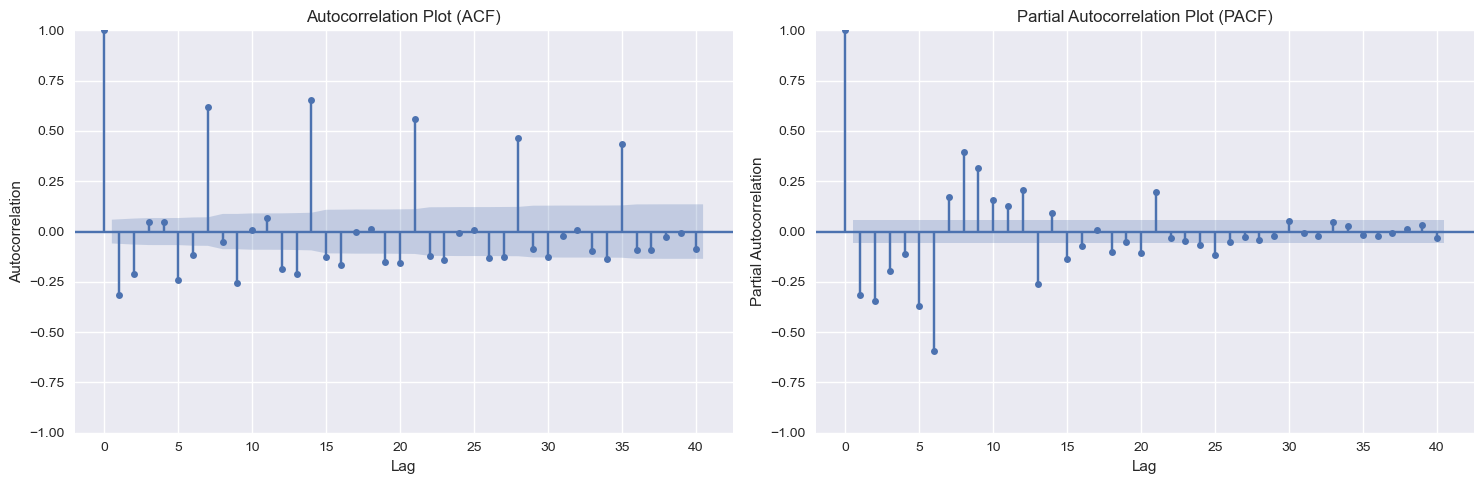

84930.9677390068

In [28]:
# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
adjusting_diff = 1

# Plot ACF
plot_acf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(train_df['new_confirmed'].diff(adjusting_diff).dropna(), lags=40, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


train_df['new_confirmed'].diff(adjusting_diff).std()

### <a id='toc3_2_1_'></a>[Base Arima Model](#toc0_)

In [29]:
val_eval_holder = pd.DataFrame().rename_axis('Validation Metric', axis=1)
in_sample_eval_holder = pd.DataFrame().rename_axis('In-Sample Metric', axis=1)
out_of_sample_eval_holder = pd.DataFrame()


In [30]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# Check if the training flag is set to True
if training:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # and then fits an ARIMA model to the transformed data.
    estimators = [
        ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
        ("model", pm.arima.ARIMA(order= (6,1,2), suppress_warnings=True)) # ARIMA model                   
                        ]
    pipeline = Pipeline(estimators)

else:
    # If not training, then load the pre-trained model from disk
    model_1 = joblib.load('models/ARIMA(6,1,2)(0,0,0)[0] intercept.pkl')
    print("model_1 loaded successfully")


0it [00:00, ?it/s]

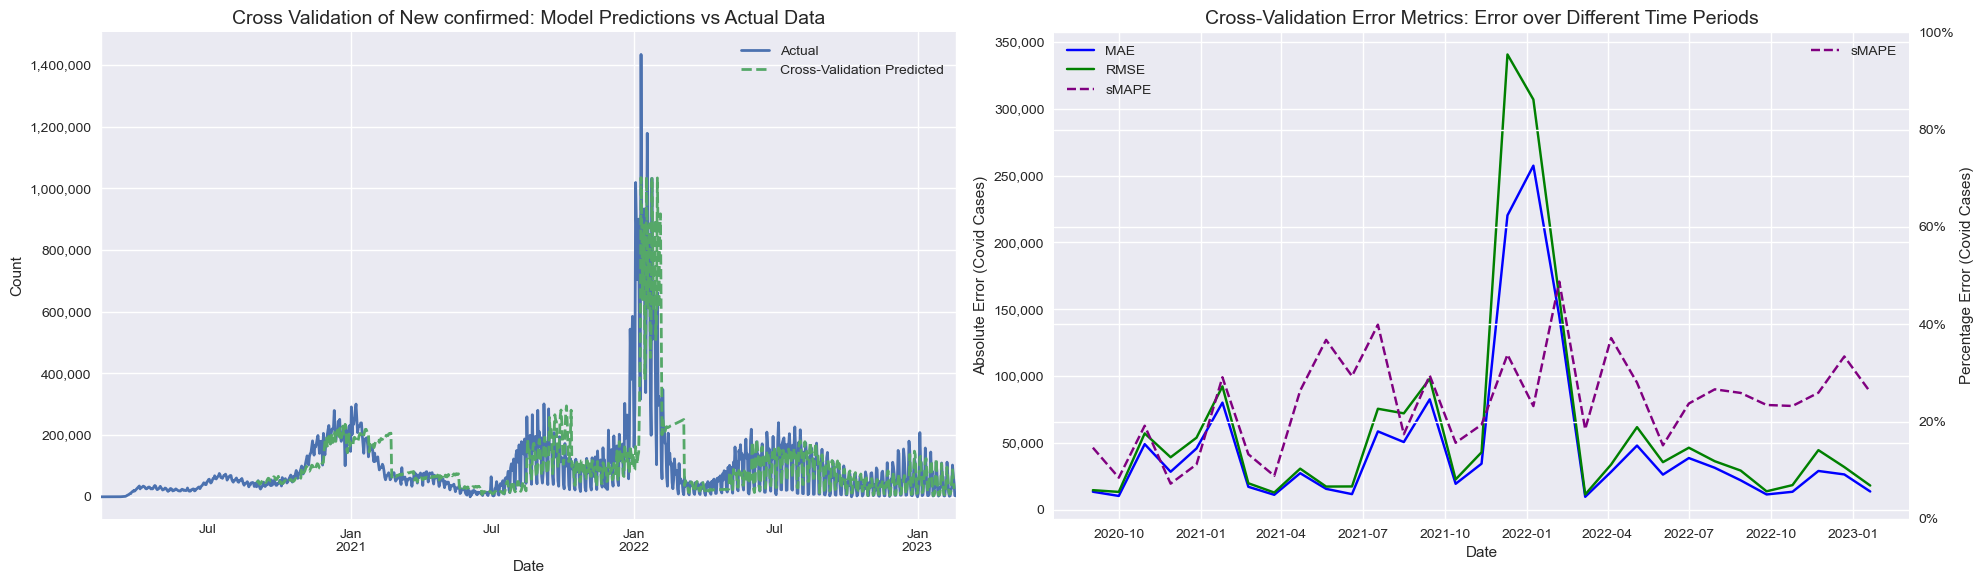

In [31]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_1 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power



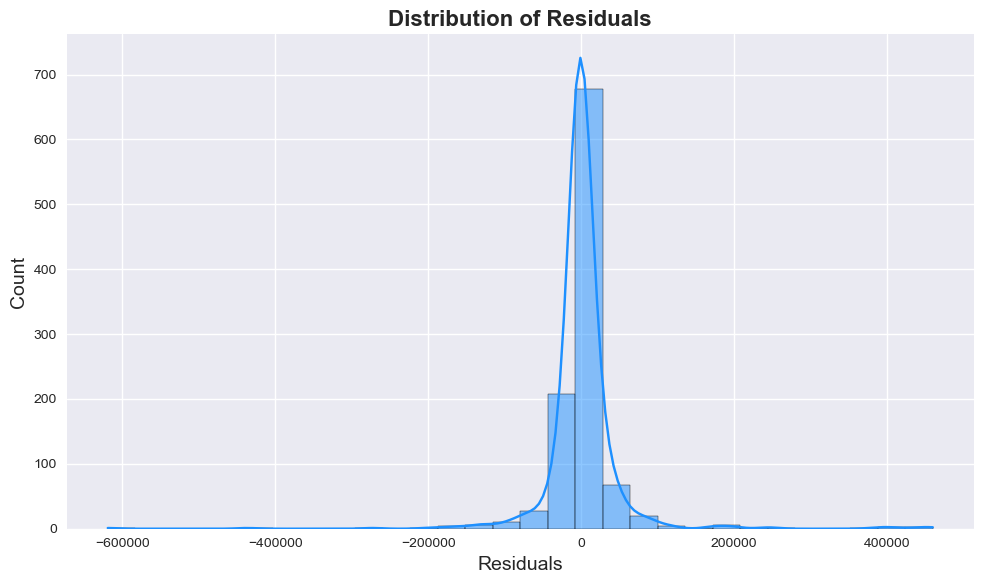

In [32]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_1)


In [33]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_1)


In [34]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = str(model_1.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results



Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept
MAE                                    47635.216405
RMSE                                   60253.263957
sMAPE                                     23.840699

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept
R-squared                                 0.837550
MAE                                   21868.910887
RMSE                                  53200.477775
sMAPE                                    12.215127

In [35]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_1, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_1.summary()

Model pickled to models/ARIMA(6,1,2)(0,0,0)[0] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1102
Model:               SARIMAX(6, 1, 2)   Log Likelihood               -3674.687
Date:                Sun, 30 Jul 2023   AIC                           7369.373
Time:                        13:36:54   BIC                           7419.413
Sample:                             0   HQIC                          7388.303
                               - 1102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2721      0.333      0.818      0.413      -0.380       0.924
ar.L1         -0.8370      0.021    -40.556      0.000      -0.877      -0.797
ar.L2         -0.9352      0.014    -65.598      0.000      -0.963      -0.907
ar.L3         -0.8629      0.017    -49.853      0.000      -0.897      -0.829
ar.L4         -0.8565      0.017    -51.092      0.000      -0.889      -0.824
ar.L5         -0.8918      0.014    -64.588      0.000      -0.919      -0.865
ar.L6         -0.7675      0.016    -46.792      0.000      -0.800      -0.735
ma.L1          0.1233      0.026      4.701      0.000       0.072       0.175
ma.L2          0.3468      0.029     11.802      0.000       0.289       0.404
sigma2        46.0878      1.034     44.558      0.000      44.060      48.115
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):              2341.48
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               5.14   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id='toc3_2_2_'></a>[Tuned Arima Model](#toc0_)

In [36]:
# Flag to determine if the model should be trained or loaded from disk
training = True


# Check if the training flag is set to True
if training:
    # # If training is required:
    # estimators = [
    # ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
    # ("model", pm.auto_arima(in_sample_set))]  # Data for ARIMA model selection
    
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
    #     ("model", pm.auto_arima( in_sample_set,  # Data for ARIMA model selection
    #                     d=1,  # Differencing order
    #                     start_p=6,  # Initial AR order for search
    #                     start_q=2,   # Initial MA order for search
    #                     max_p=13,    # Maximum AR order for search
    #                     max_q=5,    # Maximum MA order for search
    #                     seasonal=False,  # No seasonal component
    #                     trace=True))]  # Print the search progress

    # pipeline = Pipeline(estimators)  # Construct the pipeline
    
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [9, 1, 4], 
                    seasonal=False,
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 
    
else:
    # If not training, then load the pre-trained model from disk
    model_2 = joblib.load('models/ARIMA(9,1,4)(0,0,0)[0].pkl')
    print("model_2 loaded successfully")
    


0it [00:00, ?it/s]

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

c:\ProgramData\Anaco

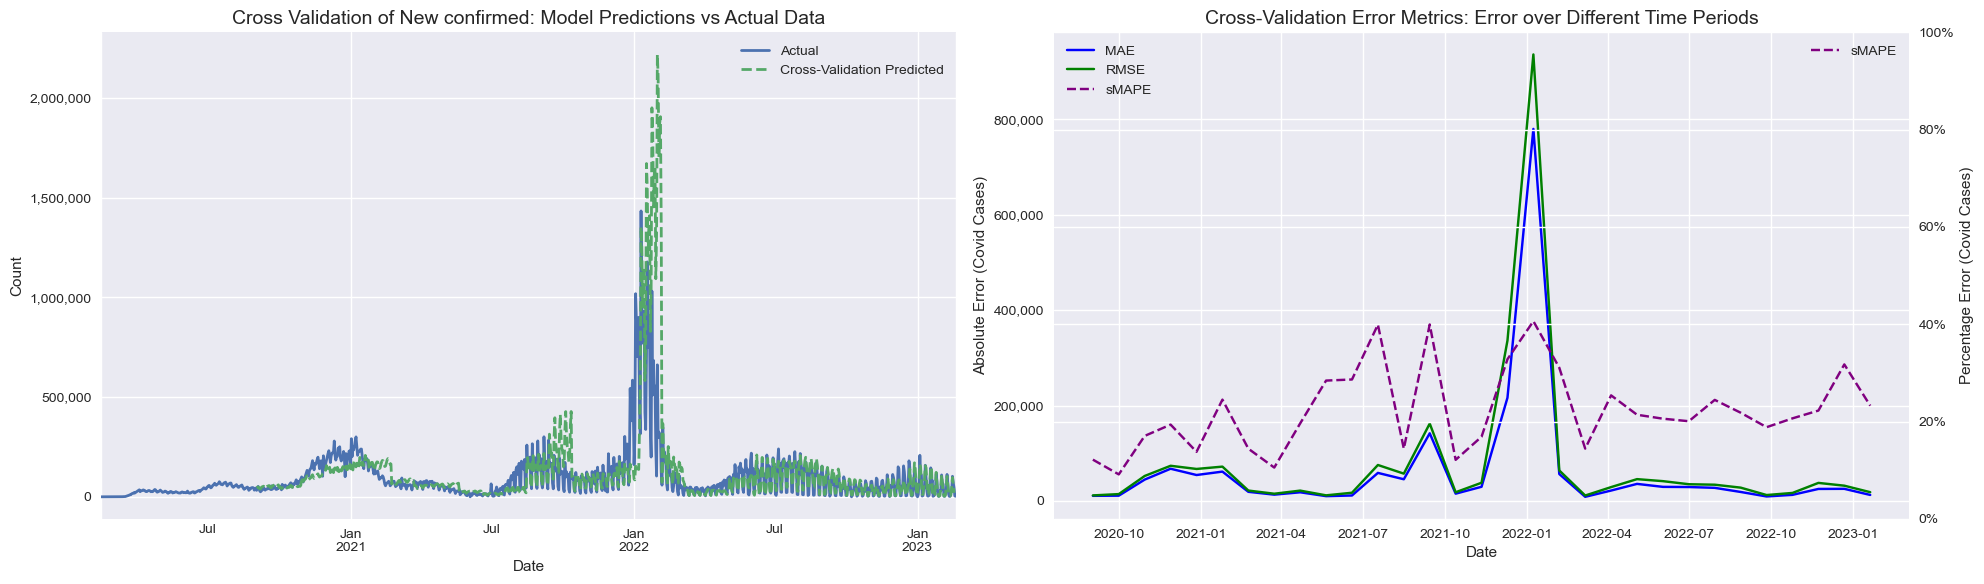

In [37]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_2 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power



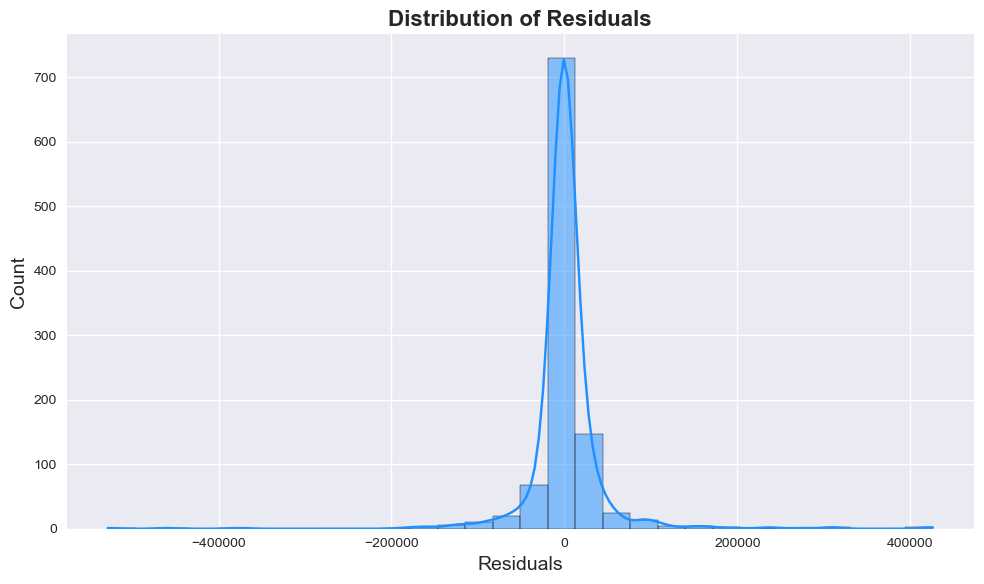

In [38]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_2)


In [39]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_2)


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [40]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = str(model_2.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  
MAE                                    61999.073270  
RMSE                                   77662.133258  
sMAPE                                     22.280213

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.837550   
MAE                                   21868.910887   
RMSE                                  53200.477775   
sMAPE                                    12.215127   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  
R-squared                                 0.870357  
MAE                                   19621.659004  
RMSE                                  47525.882003  
sMAPE                                    11.363651

In [41]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_2, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_2.summary()


Model pickled to models/ARIMA(9,1,4)(0,0,0)[0] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1102
Model:               SARIMAX(9, 1, 4)   Log Likelihood               -3620.417
Date:                Sun, 30 Jul 2023   AIC                           7270.834
Time:                        13:38:00   BIC                           7345.894
Sample:                             0   HQIC                          7299.229
                               - 1102                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0169      0.107      0.158      0.875      -0.193       0.227
ar.L1         -0.3398      2.288     -0.149      0.882      -4.824       4.145
ar.L2          0.3245      2.082      0.156      0.876      -3.757       4.406
ar.L3         -0.1618      0.403     -0.401      0.688      -0.953       0.629
ar.L4         -0.0912      0.600     -0.152      0.879      -1.268       1.085
ar.L5         -0.1394      0.525     -0.266      0.791      -1.168       0.889
ar.L6         -0.0065      0.604     -0.011      0.991      -1.189       1.176
ar.L7          0.7451      0.342      2.177      0.030       0.074       1.416
ar.L8          0.2406      1.525      0.158      0.875      -2.748       3.230
ar.L9         -0.3498      1.432     -0.244      0.807      -3.157       2.458
ma.L1         -0.4344      2.286     -0.190      0.849      -4.915       4.046
ma.L2         -0.5423      0.335     -1.619      0.106      -1.199       0.114
ma.L3          0.3820      1.109      0.345      0.730      -1.791       2.555
ma.L4         -0.0535      0.288     -0.185      0.853      -0.619       0.512
sigma2        41.9771      1.024     40.973      0.000      39.969      43.985
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2742.68
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.40   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_3_'></a>[SARIMA](#toc0_)

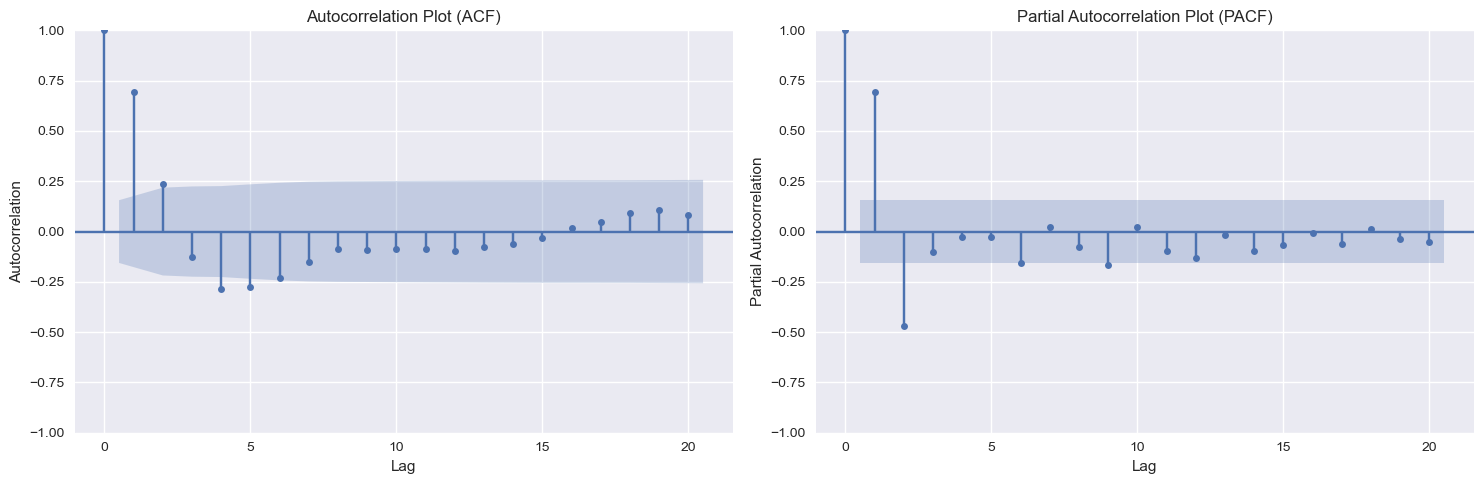

43327.72309676952

In [42]:
other_interval = train_df.resample('W').mean()
adjusting_diff = 1


# Adjust the figure size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot ACF
plot_acf(other_interval['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[0], title="Autocorrelation Plot (ACF)")
ax[0].set_xlabel("Lag")
ax[0].set_ylabel("Autocorrelation")
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

# Plot PACF
plot_pacf(other_interval['new_confirmed'].diff(adjusting_diff).dropna(), lags=20, ax=ax[1], title="Partial Autocorrelation Plot (PACF)")
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Partial Autocorrelation")
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

other_interval['new_confirmed'].diff(adjusting_diff).std()

In [43]:
check_stationarity(other_interval.new_confirmed)

Test Statistic                -3.889146
p-value                        0.002116
Number of Observations Used    2.000000
dtype: float64

### <a id='toc3_3_1_'></a>[Base SARIMA Model](#toc0_)

In [44]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# Check if the training flag is set to True
if training:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [6, 1, 2], 
                    seasonal_order =[1, 1, 1, 7],
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_3 = joblib.load('models/Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept.pkl')
    print("model_3 loaded successfully")



0it [00:00, ?it/s]

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\R

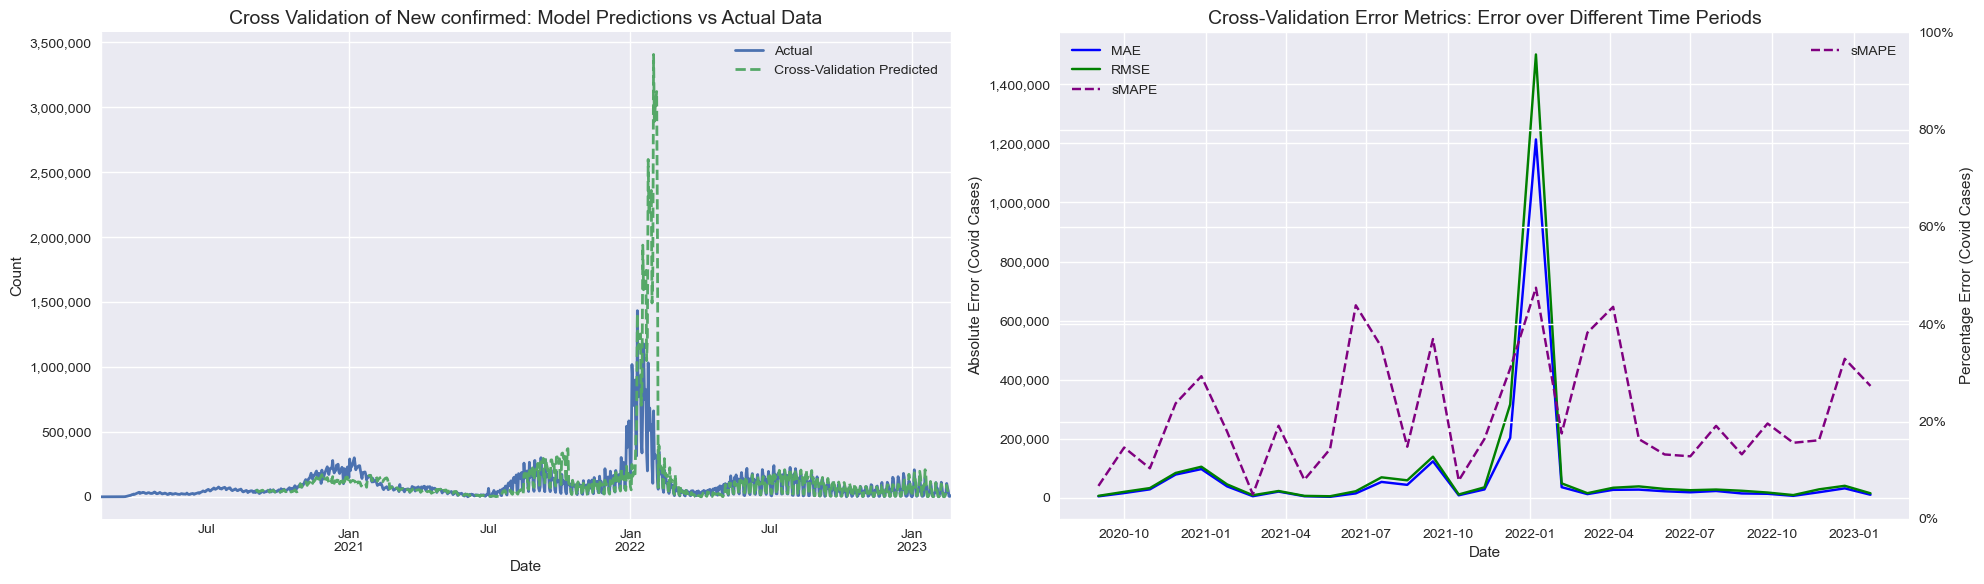

In [45]:

if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_3 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


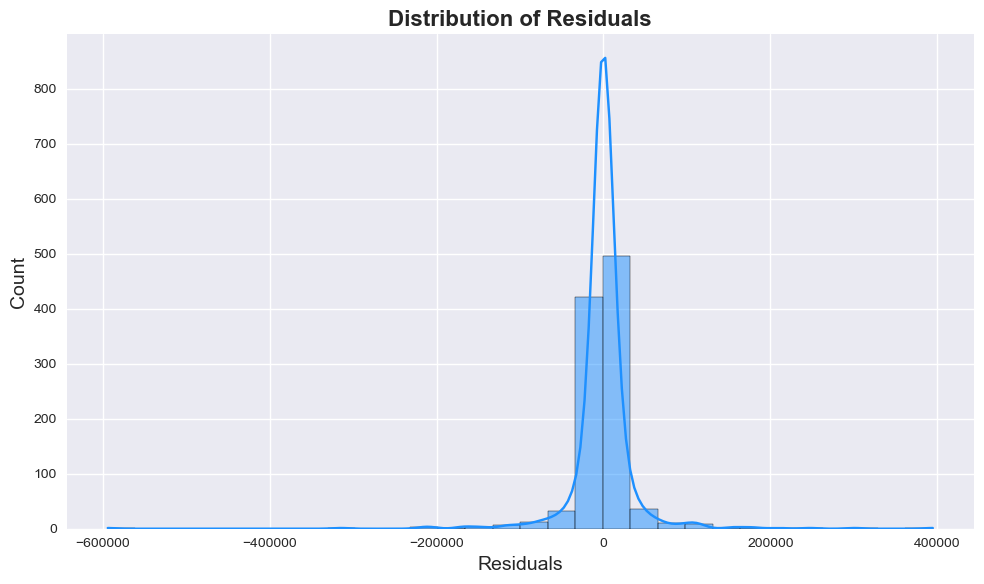

In [46]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_3)


In [47]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_3)


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power



In [48]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Seasonal ' + str(model_3.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  
MAE                                             73107.036375  
RMSE                                            92348.111389  
sMAPE                                              21.588938

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.837550   
MAE                                   21868.910887   
RMSE                                  53200.477775   
sMAPE                                    12.215127   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.870357   
MAE                                   19621.659004   
RMSE                                  47525.882003   
sMAPE                                    11.363651   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  
R-squared                                          0.903713  
MAE                                            16992.689447  
RMSE                                           40958.067785  
sMAPE                                             10.380645

In [49]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"

    # Attempt to save the model to disk using pickling
    joblib.dump(model_3, pickle_tgt, compress=3)
    print("Model pickled to %s" % pickle_tgt)


# Display the summary of the trained model
model_3.summary()

Model pickled to models/Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1102
Model:             SARIMAX(6, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -3453.907
Date:                             Sun, 30 Jul 2023   AIC                           6931.814
Time:                                     13:41:31   BIC                           6991.785
Sample:                                          0   HQIC                          6954.507
                                            - 1102                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0117      0.170     -0.069      0.945      -0.346       0.322
ar.L1         -0.6967      6.947     -0.100      0.920     -14.312      12.919
ar.L2         -0.2079      8.096     -0.026      0.980     -16.076      15.660
ar.L3         -0.1227      5.601     -0.022      0.983     -11.100      10.855
ar.L4         -0.0471      3.736     -0.013      0.990      -7.370       7.276
ar.L5         -0.0418      2.251     -0.019      0.985      -4.453       4.369
ar.L6          0.0841      1.456      0.058      0.954      -2.771       2.939
ma.L1         -0.0121      6.948     -0.002      0.999     -13.629      13.605
ma.L2         -0.2664      3.173     -0.084      0.933      -6.485       5.952
ar.S.L7        0.0555      0.185      0.300      0.764      -0.307       0.418
ma.S.L7       -0.7085      0.029    -24.019      0.000      -0.766      -0.651
sigma2        32.1701      0.681     47.271      0.000      30.836      33.504
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4496.26
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.27   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### <a id='toc3_3_2_'></a>[Tuned SARIMA Model](#toc0_)

In [50]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# # Check if the training flag is set to True
if training:
    # # # If training is required:
    
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    #     ("model", pm.auto_arima(in_sample_set,
    #                     d=1,
    #                     start_p=4, 
    #                     max_p=6, 
    #                     max_q=3, 
    #                     max_P=3, 
    #                     max_Q=3,
    #                     D=1,
    #                     m=7,
    #                     seasonal=True, 
    #                     stationary=True,
    #                     trace=True))]

    # pipeline = Pipeline(estimators)
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= [4, 0, 3], 
                    seasonal_order =[2, 0, 0, 7],
                    suppress_warnings=True))                   
                    ]

    pipeline = Pipeline(estimators) 


else:
    try:
        # If not training, then load the pre-trained model from disk
        model_4 = joblib.load('models/Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept.pkl')
        print("model_4 loaded successfully")
    except:
        print("Error loading model_4")


0it [00:00, ?it/s]

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power



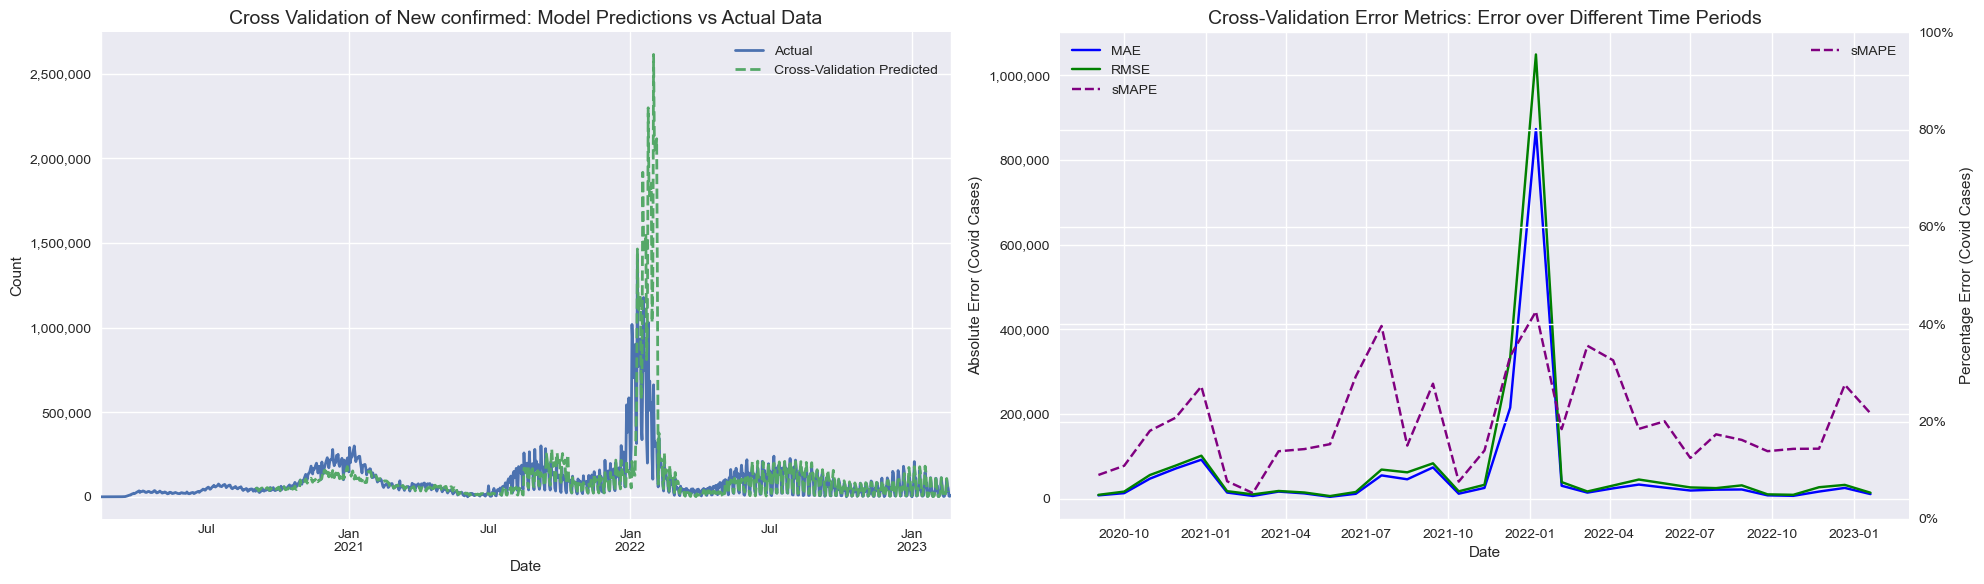

In [51]:

if training:
    # If in training mode:

    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_4 = train_model(in_sample_set, pipeline, rolling_cv)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, in_sample_set.name)


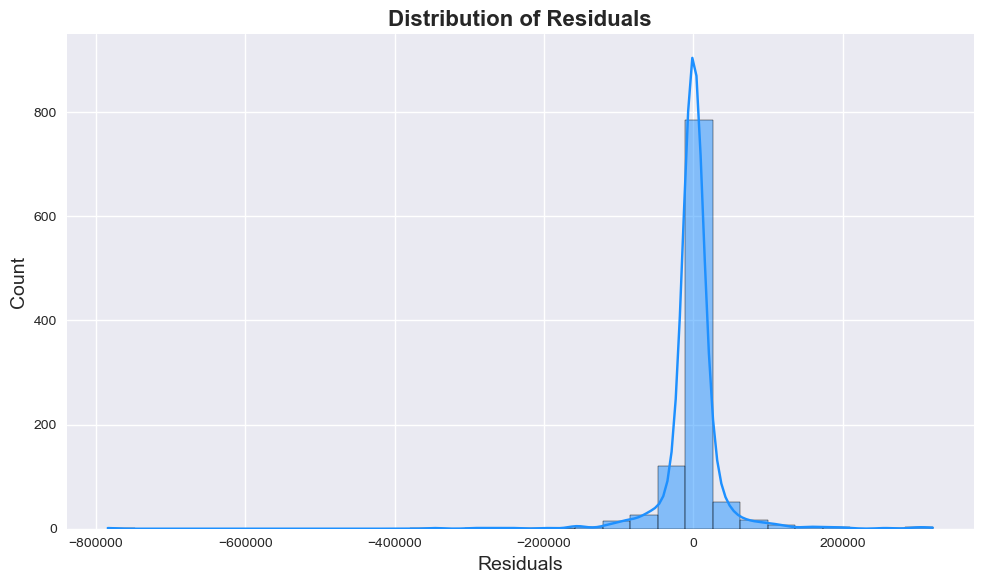

In [52]:

# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, model_4)


In [53]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, model_4)


C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power



In [54]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Seasonal ' + str(model_4.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


Validation Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
MAE                                    47635.216405   
RMSE                                   60253.263957   
sMAPE                                     23.840699   

Validation Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
MAE                                    61999.073270   
RMSE                                   77662.133258   
sMAPE                                     22.280213   

Validation Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
MAE                                             73107.036375   
RMSE                                            92348.111389   
sMAPE                                              21.588938   

Validation Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  
MAE                                             59686.993980  
RMSE                                            75135.692415  
sMAPE                                              19.863360

In-Sample Metric  ARIMA(6,1,2)(0,0,0)[0] intercept  \
R-squared                                 0.837550   
MAE                                   21868.910887   
RMSE                                  53200.477775   
sMAPE                                    12.215127   

In-Sample Metric  ARIMA(9,1,4)(0,0,0)[0] intercept  \
R-squared                                 0.870357   
MAE                                   19621.659004   
RMSE                                  47525.882003   
sMAPE                                    11.363651   

In-Sample Metric  Seasonal ARIMA(6,1,2)(1,1,1)[7] intercept  \
R-squared                                          0.903713   
MAE                                            16992.689447   
RMSE                                           40958.067785   
sMAPE                                             10.380645   

In-Sample Metric  Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept  
R-squared                                          0.876668  
MAE                                            17925.050091  
RMSE                                           46354.773673  
sMAPE                                             10.194343

In [55]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_4, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")

# Display the summary of the trained model
model_4.summary()

Model pickled to models/Seasonal ARIMA(4,0,3)(2,0,0)[7] intercept.pkl


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1102
Model:             SARIMAX(4, 0, 3)x(2, 0, [], 7)   Log Likelihood               -3544.312
Date:                            Sun, 30 Jul 2023   AIC                           7110.624
Time:                                    13:44:46   BIC                           7165.678
Sample:                                         0   HQIC                          7131.450
                                           - 1102                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.081      0.007      0.995      -0.159       0.160
ar.L1          1.3732      0.231      5.935      0.000       0.920       1.827
ar.L2         -0.8692      0.355     -2.452      0.014      -1.564      -0.174
ar.L3          0.2931      0.189      1.547      0.122      -0.078       0.664
ar.L4          0.1490      0.036      4.123      0.000       0.078       0.220
ma.L1         -1.1708      0.233     -5.024      0.000      -1.628      -0.714
ma.L2          0.8687      0.313      2.774      0.006       0.255       1.483
ma.L3         -0.2742      0.150     -1.831      0.067      -0.568       0.019
ar.S.L7        0.5011      0.019     26.397      0.000       0.464       0.538
ar.S.L14       0.4961      0.019     26.320      0.000       0.459       0.533
sigma2        35.6927      0.688     51.866      0.000      34.344      37.041
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4787.69
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.50   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## <a id='toc3_4_'></a>[Sarimax](#toc0_)

In [56]:
# import in variance inflation facctor test and add constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import RFE


In [57]:
y_train = in_sample_set
y_test = out_of_sample_set

# # Assuming in_sample_set is a DataFrame
# X_train = train_df.drop(columns=['new_confirmed', 'confirmed','infected'])
# X_test = test_df.drop(columns=['new_confirmed', 'confirmed', 'infected'])

most_important = ['stringency_index', 'derived_reproduction_rate', 'total_vaccinations', 
                'current_hospitalized_patients',  'excess_mortality', 'month']

X_train = train_df[most_important]
X_test = test_df[['stringency_index', 'derived_reproduction_rate', 'current_hospitalized_patients',  
                'excess_mortality', 'month', 'new_bi_weekly_vaccinations']]

In [58]:

# #Selecting the Best important features according to LGBMRegressor
rfe_selector = RFE(estimator=LGBMRegressor(), n_features_to_select = 7, step = 1)
rfe_selector.fit(X_train, y_train)


X_train = X_train.loc[:,X_train.columns[rfe_selector.get_support()]]
X_train.columns

Index(['stringency_index', 'derived_reproduction_rate', 'total_vaccinations',
       'current_hospitalized_patients', 'excess_mortality', 'month'],
      dtype='object')

In [59]:
X_train = add_constant(X_train)

#  VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False).style.background_gradient(cmap='coolwarm', vmax=10))


X_train.drop(columns=['const'], inplace=True)

In [60]:
for i in X_train.columns:
    print(i)
    test_stationarity(X_train[i], False)
    


stringency_index
Results of Dickey-Fuller Test:


Test Statistic                   -3.499147
p-value                           0.008009
#Lags Used                        7.000000
Number of Observations Used    1094.000000
Critical Value (1%)              -3.436342
Critical Value (5%)              -2.864186
Critical Value (10%)             -2.568179
dtype: float64

derived_reproduction_rate
Results of Dickey-Fuller Test:


Test Statistic                -7.636494e+00
p-value                        1.946180e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.098000e+03
Critical Value (1%)           -3.436320e+00
Critical Value (5%)           -2.864176e+00
Critical Value (10%)          -2.568173e+00
dtype: float64

total_vaccinations
Results of Dickey-Fuller Test:


Test Statistic                   -1.158045
p-value                           0.691378
#Lags Used                       22.000000
Number of Observations Used    1079.000000
Critical Value (1%)              -3.436425
Critical Value (5%)              -2.864222
Critical Value (10%)             -2.568198
dtype: float64

current_hospitalized_patients
Results of Dickey-Fuller Test:


Test Statistic                   -4.182947
p-value                           0.000704
#Lags Used                       21.000000
Number of Observations Used    1080.000000
Critical Value (1%)              -3.436419
Critical Value (5%)              -2.864220
Critical Value (10%)             -2.568197
dtype: float64

excess_mortality
Results of Dickey-Fuller Test:


Test Statistic                   -4.091615
p-value                           0.001000
#Lags Used                       21.000000
Number of Observations Used    1080.000000
Critical Value (1%)              -3.436419
Critical Value (5%)              -2.864220
Critical Value (10%)             -2.568197
dtype: float64

month
Results of Dickey-Fuller Test:


Test Statistic                   -2.888508
p-value                           0.046701
#Lags Used                        0.000000
Number of Observations Used    1101.000000
Critical Value (1%)              -3.436303
Critical Value (5%)              -2.864169
Critical Value (10%)             -2.568170
dtype: float64

In [61]:
test_statistics = []
# Iterate over possible differencing levels from 1 to 19
for i in range(1, 20):
    # Difference the 'confirmed' series by the current level and drop NA values
    differenced_series = X_train['total_vaccinations'].diff(i).dropna()
    
    # Get the test statistic from the stationarity check and append to the list
    test_stat = check_stationarity(differenced_series).loc['Test Statistic']
    test_statistics.append(test_stat)

# Display the collected test statistics for each differencing level
for i, test_stat in enumerate(test_statistics, 1):
    print(f"Differencing Level {i}: Test Statistic = {test_stat:.2f}")

Differencing Level 1: Test Statistic = -2.13
Differencing Level 2: Test Statistic = -2.17
Differencing Level 3: Test Statistic = -2.33
Differencing Level 4: Test Statistic = -2.30
Differencing Level 5: Test Statistic = -2.44
Differencing Level 6: Test Statistic = -1.98
Differencing Level 7: Test Statistic = -2.14
Differencing Level 8: Test Statistic = -2.72
Differencing Level 9: Test Statistic = -2.40
Differencing Level 10: Test Statistic = -2.19
Differencing Level 11: Test Statistic = -2.11
Differencing Level 12: Test Statistic = -2.48
Differencing Level 13: Test Statistic = -2.71
Differencing Level 14: Test Statistic = -2.84
Differencing Level 15: Test Statistic = -3.73
Differencing Level 16: Test Statistic = -3.19
Differencing Level 17: Test Statistic = -2.73
Differencing Level 18: Test Statistic = -2.46
Differencing Level 19: Test Statistic = -2.52


In [62]:
X_train['bi_weekly_vaccinations'] = X_train.loc[:,'total_vaccinations'].diff(15)
X_train.head(20)

stringency_index  derived_reproduction_rate  total_vaccinations  \
date                                                                          
2020-02-15          8.330000                  35.466824                 0.0   
2020-02-16          8.330000                  34.655106                 0.0   
2020-02-17          8.330000                  33.889042                 0.0   
2020-02-18          8.330000                  33.163906                 0.0   
2020-02-19          8.330000                  32.475555                 0.0   
2020-02-20          8.330000                  31.820343                 0.0   
2020-02-21          8.330000                  31.195034                 0.0   
2020-02-22          8.330000                  30.596754                 0.0   
2020-02-23          8.330000                  30.022940                 0.0   
2020-02-24          8.330000                  29.471287                 0.0   
2020-02-25          8.330000                  28.939724                 0.0   
2020-02-26          8.330000                  28.426376                 0.0   
2020-02-27          8.330000                  27.929544                 0.0   
2020-02-28          8.330000                  27.447676                 0.0   
2020-02-29          8.330000                  26.979353                 0.0   
2020-03-01         11.110000                  26.523272                 0.0   
2020-03-02         11.110000                  26.078230                 0.0   
2020-03-03         11.110000                  25.643112                 0.0   
2020-03-04         11.110000                  25.216887                 0.0   
2020-03-05         20.370001                  24.798582                 0.0   

            current_hospitalized_patients  excess_mortality  month  \
date                                                                 
2020-02-15                            0.0         -2.363827      2   
2020-02-16                            0.0         -2.360000      2   
2020-02-17                            0.0         -2.294236      2   
2020-02-18                            0.0         -2.166535      2   
2020-02-19                            0.0         -1.976897      2   
2020-02-20                            0.0         -1.734526      2   
2020-02-21                            0.0         -1.494650      2   
2020-02-22                            0.0         -1.266475      2   
2020-02-23                            0.0         -1.050000      2   
2020-02-24                            0.0         -0.845225      2   
2020-02-25                            0.0         -0.652150      2   
2020-02-26                            0.0         -0.470775      2   
2020-02-27                            0.0         -0.301870      2   
2020-02-28                            0.0         -0.150054      2   
2020-02-29                            0.0         -0.016098      2   
2020-03-01                            0.0          0.100000      3   
2020-03-02                            0.0          0.198238      3   
2020-03-03                            0.0          0.278618      3   
2020-03-04                            0.0          0.341138      3   
2020-03-05                            0.0          0.386766      3   

            bi_weekly_vaccinations  
date                                
2020-02-15                     NaN  
2020-02-16                     NaN  
2020-02-17                     NaN  
2020-02-18                     NaN  
2020-02-19                     NaN  
2020-02-20                     NaN  
2020-02-21                     NaN  
2020-02-22                     NaN  
2020-02-23                     NaN  
2020-02-24                     NaN  
2020-02-25                     NaN  
2020-02-26                     NaN  
2020-02-27                     NaN  
2020-02-28                     NaN  
2020-02-29                     NaN  
2020-03-01                     0.0  
2020-03-02                     0.0  
2020-03-03                   

In [63]:
X_train['bi_weekly_vaccinations'] = X_train['bi_weekly_vaccinations'].fillna(0)

In [64]:
X_train = X_train.drop(columns='total_vaccinations')

In [65]:
X_train = add_constant(X_train)

#  VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
display(vif_data.sort_values(by='VIF', ascending=False).style.background_gradient(cmap='coolwarm', vmax=10))


X_train.drop(columns=['const'], inplace=True)

### <a id='toc3_4_1_'></a>[Sarimax Base](#toc0_)

In [66]:
# Flag to determine if the model should be trained or loaded from disk
training = True

# # Check if the training flag is set to True
if training:
    # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-2)),
    ("model", pm.arima.ARIMA(order= (6,1,2), 
                    seasonal_order =(1,1,1,7),
                    suppress_warnings=True))                   
                    ]
    
    pipeline = Pipeline(estimators) 

else:
    try:
        # If not training, then load the pre-trained model from disk
        model_5 = joblib.load('models/Exogenous ARIMA(6,1,2)(1,1,1)[7]')
        print("model_5 loaded successfully")
    except:
        print("Error loading model_5")


In [67]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_5 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)

    # pm.model_selection.cross_validate(pipeline, y_train, X_train, cv=rolling_cv, scoring='mean_squared_error')

0it [00:00, ?it/s]

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\Roaming\Python\Python39\site-packages\pmdarima\preprocessing\endog\boxcox.py:165: RuntimeWarning:

invalid value encountered in power

C:\Users\Samsickle\AppData\R

In [ ]:


# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_5)


In [ ]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_5)


In [ ]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_5.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()
    
in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


In [ ]:

if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_5, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_5.summary()

### <a id='toc3_4_2_'></a>[Tuned SARIMAX Model](#toc0_)

In [ ]:
# # Flag to determine if the model should be trained or loaded from disk
training = True

if training:
    # # # # If training is required:
    
    # # # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    # # # and then automatically determines the best ARIMA order within the given range using auto_arima.
    # estimators = [
    #     ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    #     ("model", pm.auto_arima(y_train,
    #                     X_train,
    #                     start_p=3,
    #                     d=1,
    #                     star_q=2,
    #                     max_p=6,
    #                     max_q=4,
    #                     start_P=1,
    #                     D=1,
    #                     start_Q=1,
    #                     max_P=3,
    #                     max_Q=3,
    #                     m=7,
    #                     seasonal=True, 
    #                     stationary=True,
    #                     trace=True))]


    # pipeline = Pipeline(estimators)
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= (6, 0, 3), 
                    seasonal_order =(1, 0, 0, 7),
                    suppress_warnings=True))               
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_6 = joblib.load('models/Exogenous ARIMA(6,0,3)(1,0,0)[7] intercept.pkl')
    print("model_6 loaded successfully")



In [ ]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_6 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)



In [ ]:
# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_6)


In [ ]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_6)


In [ ]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_6.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
if training:
    display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


In [ ]:
if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_6, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_6.summary()

## <a id='toc3_5_'></a>[Brute Force Search for SARIMAX Model](#toc0_)

In [ ]:
brute_force = False


In [ ]:

def sarimax(ts,exo,all_param):
    results = []
    for param in all_param:
        try:
            mod = SARIMAX(ts,
                        exog = exo,
                        order=param[0],
                        seasonal_order=param[1])
            res = mod.fit()
            results.append((res,res.aic,param))
            print('Tried out SARIMAX{}x{} - AIC:{}'.format(param[0], param[1], round(res.aic,2)))
        except Exception as e:
            print(e)
            continue
            
    return results

if brute_force:
    # set parameter range
    p,d,q = range(1,4),[1],range(0,4)
    P,D,Q,s = range(0,3),[1],range(0,3),[7]
    # list of all parameter combos
    pdq = list(product(p, d, q))
    seasonal_pdq = list(product(P, D, Q, s))
    all_param = list(product(pdq,seasonal_pdq))



    all_res = sarimax(y_train, X_train,all_param)


In [ ]:
if brute_force:
    grid = pd.DataFrame(all_res).sort_values(by=2).rename(columns={0: 'drop', 1:'AIC',2:'Order'}).drop(columns='drop')

    fig, ax = plt.subplots(figsize=(15,5))
    grid.plot(x='Order', y='AIC', ax=ax, marker='o', linestyle='--', color='r')

    # Setting axis labels
    ax.set_xlabel("ARIMA Order")
    ax.set_ylabel("AIC Value")
    ax.set_title('Grid Search of ARIMA Order and AIC Value')

    # Making x-ticks vertical
    plt.xticks(rotation=90)

    # Marking the lowest AIC with a vertical line
    min_AIC_order = grid['AIC'].argmin()
    ax.axvline(x=min_AIC_order, color='b', linestyle='--', label=f"Lowest AIC at {grid.loc[min_AIC_order, 'Order']}")
    ax.legend()

    # Setting y-axis limits
    ax.set_ylim(26300, 27200)

    plt.show()

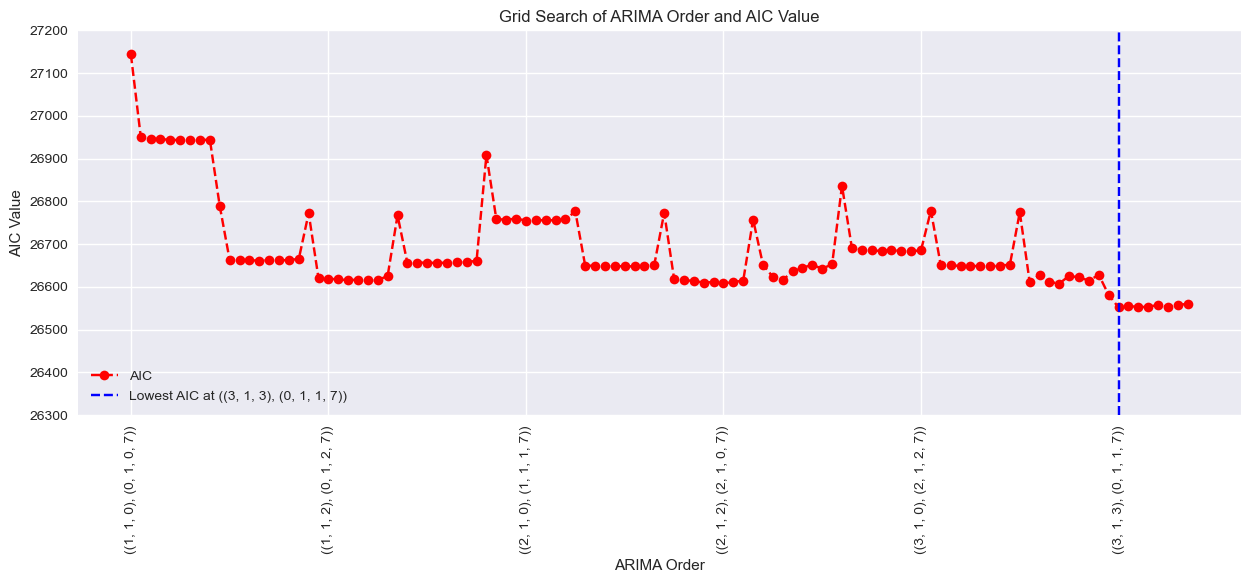

In [ ]:
if brute_force:
    boxcox = BoxCoxEndogTransformer(lmbda2=1e-2)
    transformed_y = boxcox.fit_transform(y_train)

    # set parameter range
    p,d,q = range(4,7),[1],range(0,4)
    P,D,Q,s = range(0,3),[1],range(0,3),[7]

    # list of all parameter combos
    pdq = list(product(p, d, q))
    seasonal_pdq = list(product(P, D, Q, s))
    all_param = list(product(pdq,seasonal_pdq))

    all_res_1 = sarimax(y_train, X_train, all_param)


In [ ]:
if brute_force:
    grid = pd.DataFrame(all_res_1).sort_values(by=2).rename(columns={0: 'drop', 1:'AIC',2:'Order'}).drop(columns='drop')

    fig, ax = plt.subplots(figsize=(15,5))
    grid.plot(x='Order', y='AIC', ax=ax, marker='o', linestyle='--', color='r')

    # Setting axis labels
    ax.set_xlabel("ARIMA Order")
    ax.set_ylabel("AIC Value")
    ax.set_title('Grid Search of ARIMA Order and AIC Value')

    # Making x-ticks vertical
    plt.xticks(rotation=90)

    # Marking the lowest AIC with a vertical line
    min_AIC_order = grid['AIC'].argmin()
    ax.axvline(x=min_AIC_order, color='b', linestyle='--', label=f"Lowest AIC at {grid.loc[min_AIC_order, 'Order']}")
    ax.legend()

    # Setting y-axis limits
    ax.set_ylim(26300, 27200)

    plt.show()

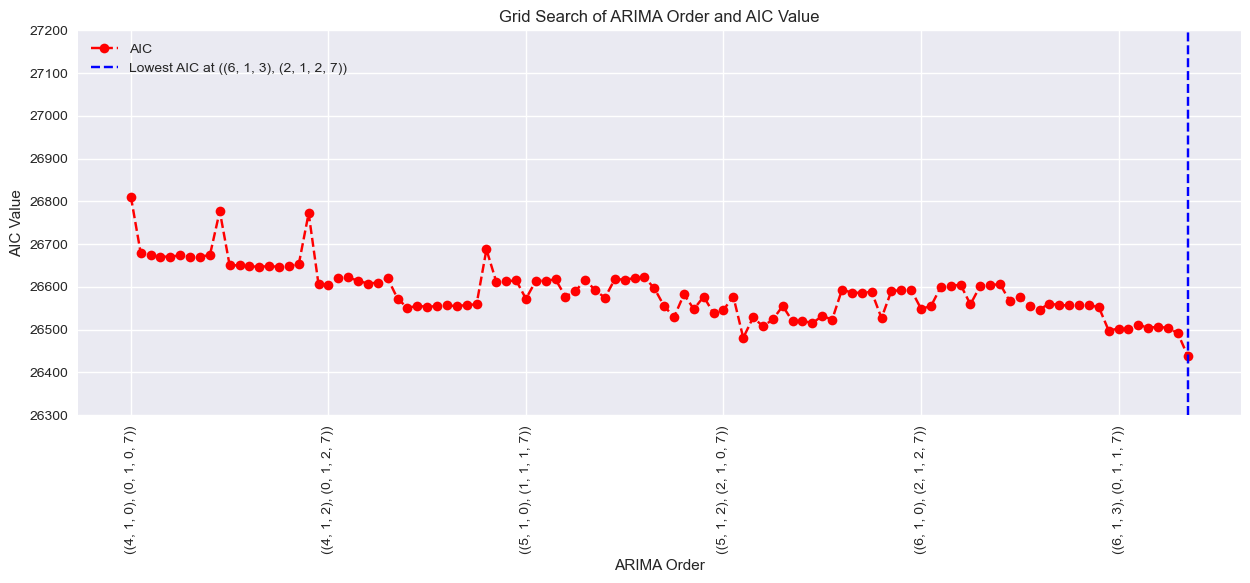

In [ ]:
# # Flag to determine if the model should be trained or loaded from disk
training = True

if training:
    # # # If training is required:
    
    # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
    estimators = [
    ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),
    ("model", pm.arima.ARIMA(order= (6, 1, 3), 
                    seasonal_order =(2, 1, 2, 7),
                    suppress_warnings=True))               
                    ]

    pipeline = Pipeline(estimators) 

else:
    # If not training, then load the pre-trained model from disk
    model_7 = joblib.load('models/Exogenous ARIMA(6,1,3)(2,1,2)[7]')
    print("model_7 loaded successfully")



In [ ]:
if training:
    # If in training mode:
    
    # Train the model using the specified pipeline and cross-validation window
    daily_values, val_scores, model_7 = train_model(y_train, pipeline, rolling_cv, X_train)

    # Visualize the model's performance on the validation set
    plot_combined_charts(daily_values, val_scores, y_train.name)



In [ ]:
# Visualize the model's in-sample predictions with confidence intervals
in_sample_scores = plot_predictions_with_confidence_interval(y_train, model_7)


In [ ]:

# Evaluate the model's forecasting performance on the out-of-sample data
test_scores = evaluate_forecast(y_train, y_test, model_7)


In [ ]:

# Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
model_name = 'Exogenous ' + str(model_7.steps[-1][1]).strip()

# Store evaluation metrics in their respective dictionaries
if training:
    val_eval_holder[model_name] = val_scores.mean()

in_sample_eval_holder[model_name] = in_sample_scores
out_of_sample_eval_holder[model_name] = test_scores

# Display evaluation results
if training:
    display(val_eval_holder)
display(in_sample_eval_holder)
# display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


In [ ]:
if training:
    # If in training mode:
    
    # Define the path where the trained model will be pickled (saved) to
    pickle_tgt = f"models/{model_name}.pkl"
    
    try:
        # Attempt to save the model to disk using pickling
        joblib.dump(model_7, pickle_tgt, compress=3)
        print("Model pickled to %s" % pickle_tgt)
        
    except:
        # If there's an error during pickling, display an error message
        print("Error pickling model")


# Display the summary of the trained model
model_7.summary()

## <a id='toc3_6_'></a>[Final Results and Evaluation](#toc0_)

In [ ]:
display(val_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(in_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))
display(out_of_sample_eval_holder.style.background_gradient(cmap='coolwarm', axis=1))

In [ ]:
# # Flag to determine if the model should be trained or loaded from disk
# training = REPLACETHIS

# # Check if the training flag is set to True
# if training:
    
#     # Initialize a pipeline that first applies a Box-Cox transformation to stabilize variance
#     estimators = [
#         ("boxcox", BoxCoxEndogTransformer(lmbda2=1e-6)),  # Box-Cox transformation
#         ("model", REPLACETHIS)) # ARIMA model                   
#                         ]
#     pipeline = Pipeline(estimators)

# else:
#     # If not training, then load the pre-trained model from disk
#     REPLACETHIS = joblib.load('models/REPLACETHIS intercept.pkl')
#     print("REPLACETHIS loaded successfully")


# if training:
#     # If in training mode:
    
#     # Train the model using the specified pipeline and cross-validation window
#     daily_values, val_scores, REPLACETHIS = train_model(in_sample_set, pipeline, rolling_cv)

#     # Visualize the model's performance on the validation set
#     plot_combined_charts(daily_values, val_scores, in_sample_set.name)


# # Visualize the model's in-sample predictions with confidence intervals
# in_sample_scores = plot_predictions_with_confidence_interval(in_sample_set, REPLACETHIS)

# # Evaluate the model's forecasting performance on the out-of-sample data
# test_scores = evaluate_forecast(in_sample_set, out_of_sample_set, REPLACETHIS)

# # Extract the name of the model from the pipeline for use as a key in evaluation dictionaries
# model_name = str(REPLACETHIS.steps[-1][1]).strip()

# # Store evaluation metrics in their respective dictionaries
# val_eval_holder[model_name] = val_scores.mean()
# in_sample_eval_holder[model_name] = in_sample_scores
# out_of_sample_eval_holder[model_name] = test_scores

# # Display evaluation results
# display(val_eval_holder)
# display(in_sample_eval_holder)
# # display(out_of_sample_eval_holder)  # This line is commented; uncomment if you wish to display out-of-sample results


# if training:
#     # If in training mode:
    
#     # Define the path where the trained model will be pickled (saved) to
#     pickle_tgt = f"models/{model_name}.pkl"
    
#     try:
#         # Attempt to save the model to disk using pickling
#         joblib.dump(REPLACETHIS, pickle_tgt, compress=3)
#         print("Model pickled to %s" % pickle_tgt)
        
#     except:
#         # If there's an error during pickling, display an error message
#         print("Error pickling model")


# # Display the summary of the trained model
# REPLACETHIS.summary()